In [1]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
import argparse
from IPython.display import clear_output
from numpy.random import random_sample
import matplotlib
from astropy.io import fits
from matplotlib.colors import LogNorm
import pickle

import pandas as pd
import seaborn as sns

import ngmix
from ngmix.observation import Observation, ObsList, MultiBandObsList
from ngmix.fitting import LMSimple
import numpy as np
from numpy import array
from numpy.random import uniform as urand
from ngmix.bootstrap import EMRunner

from scipy.optimize import curve_fit
from scipy import stats

from matplotlib import colors, ticker, cm


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [3]:
import sys
sys.path.append('/Users/zhangtianqing/Documents/Research/PSF_Rachel/HOMESim')
import homesm
import metasm

In [4]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [5]:
galsim.hsm.HSMParams(max_mom2_iter = 6000)

galsim.hsm.HSMParams(3.0,3.6,25.0,1,2,1e-06,6000,-1,0.25,8000.0,15.0,4,0.0,1.0,-1000.0)

In [6]:
def do_tests(tests):
    testsresult=[]
    for i in range(len(tests)):
        test = homesm.PSFSameSecondTest(*tests[i][:-1],**tests[i][-1])
        results = test.get_results(metacal = True)
        testsresult.append(results)
        #clear_output() 
        print ("Finished "+str(float((i+1))/len(tests)*100)+"%")
    return testsresult
    

In [7]:
cmap = sns.color_palette("colorblind")
# rgba = cmap(0)
# color_tone = (cmap(0./12)[0:3],cmap(2./12)[0:3],cmap(4./12)[0:3],cmap(6./12)[0:3])

# cmap2 = cm.get_cmap('Paired')
# rgba2 = cmap2(0)
# color_tone2 = (cmap2(1./12)[0:3],cmap2(3./12)[0:3],cmap2(5./12)[0:3],cmap2(7./12)[0:3])

# # color_tone = ['#00429d', '#73a2c6', '#f4777f', '#93003a']
# # color_tone2 = ['#001969', '#6f8996', '#d58563', '#84002f']
# print color_tone
# print color_tone2
print cmap[0]

(0.00392156862745098, 0.45098039215686275, 0.6980392156862745)


In [8]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [9]:
# different type of galaxy and different type of psf light profile, but with 2.0 gal_sig and 0.6 psf_sig
#       gal_type   ,gal_sig,e1 ,e2 , psf_type    ,psf_sig,SE   ,optionals    
test1= [("gaussian" ,0.5    ,0.0,-0.4+0.01*i,"sersic"  ,0.5     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48}) for i in range(81)
      ]

In [9]:
test1result = []
for i in range(len(test1)):
    test = homesm.PSFSameSecondTest(*test1[i][:-1],**test1[i][-1])
    results = test.get_results()
    test1result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test1)*100)+"%")

Finished 100.0%


/Users/zhangtianqing/miniconda2/envs/galsim_env/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


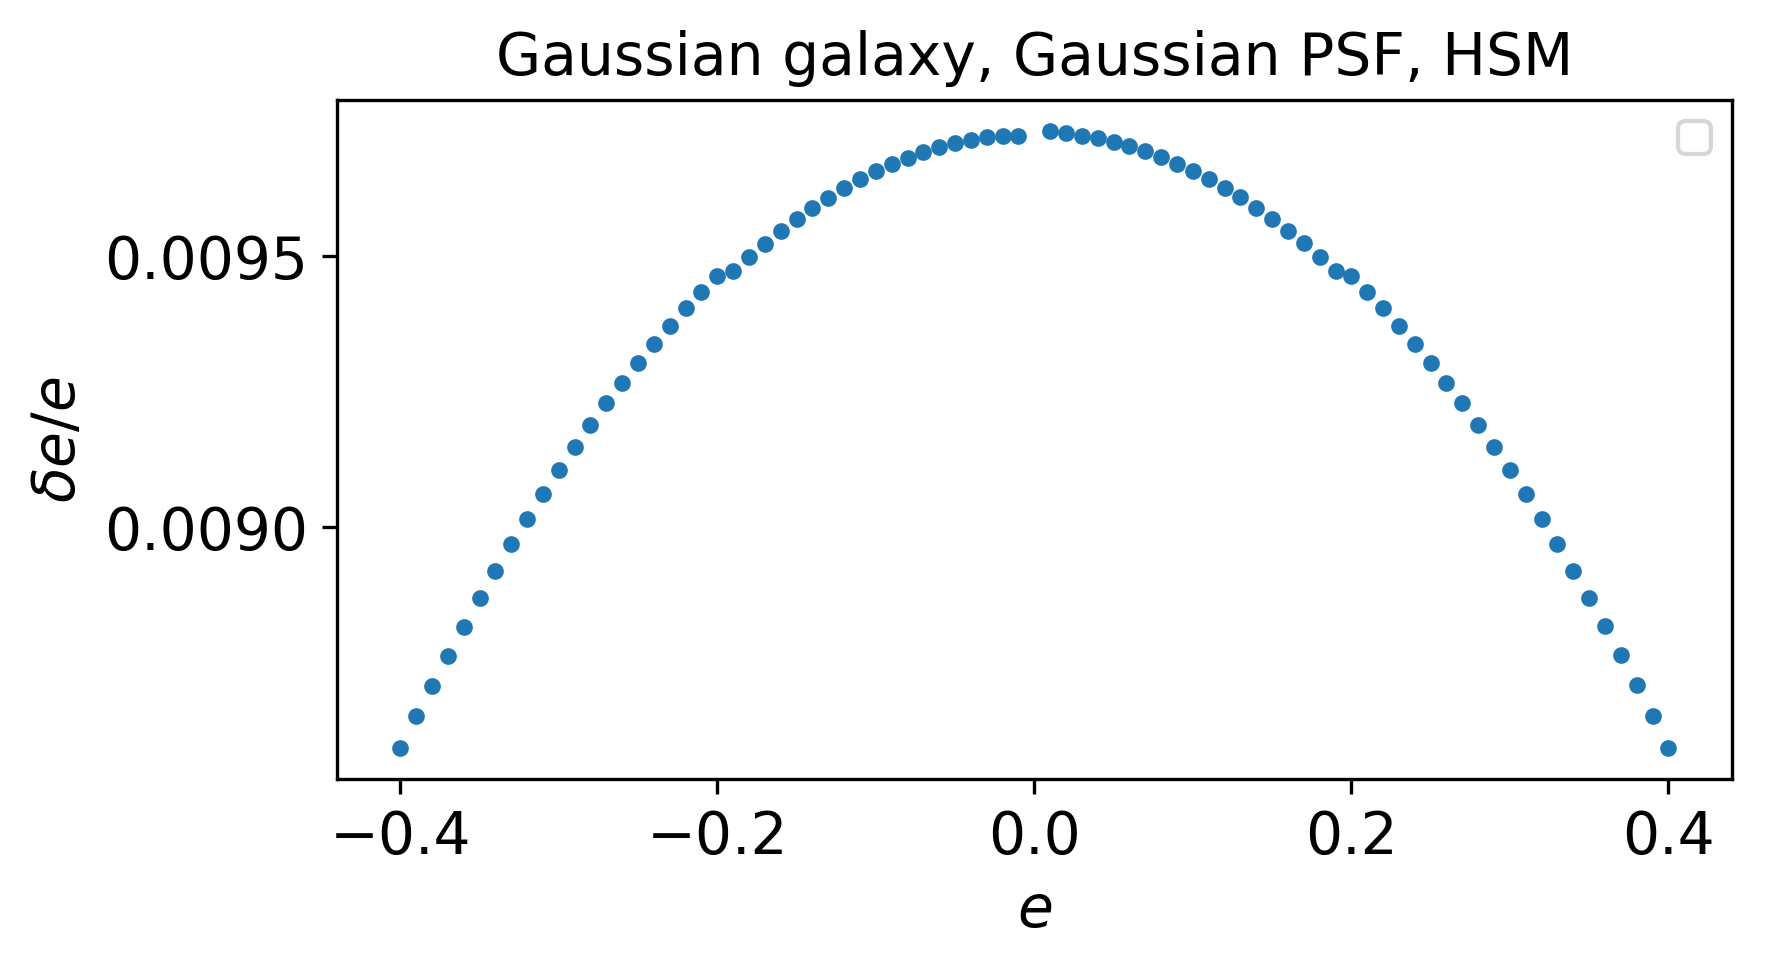

In [10]:
plt.figure(figsize = (6,3))
plt.plot([t['e2'] for t in test1result],np.array([t["measurement"]/abs(t['e2']) for t in test1result]),'.')

plt.xlabel(r"$e$")
plt.ylabel(r"$\delta e/ e$")
plt.legend()
plt.title("Gaussian galaxy, Gaussian PSF, HSM")
plt.show()

In [10]:
# different type of galaxy and different type of psf light profile, but with 2.0 gal_sig and 0.6 psf_sig
#       gal_type   ,gal_sig,e1 ,e2 , psf_type    ,psf_sig,SE   ,optionals    
test2= [("gaussian" ,0.5    ,0.0,0.28,"sersic"  ,0.3     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i,}) for i in range(41)
      ]

In [11]:
test2result = []
for i in range(len(test2)):
    test = homesm.PSFSameSecondTest(*test2[i][:-1],**test2[i][-1])
    results = test.get_results()
    test2result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test2)*100)+"%")
    
%store test2result

Finished 100.0%
Stored 'test2result' (list)


In [12]:
# different type of galaxy and different type of psf light profile, but with 2.0 gal_sig and 0.6 psf_sig
#       gal_type   ,gal_sig,e1 ,e2 , psf_type    ,psf_sig,SE   ,optionals    
test3= [("gaussian" ,0.5    ,0.0,0.28,"sersic"  ,0.5     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i}) for i in range(41)
      ]

In [13]:
test3result = []
for i in range(len(test3)):
    test = homesm.PSFSameSecondTest(*test3[i][:-1],**test3[i][-1])
    results = test.get_results()
    test3result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test3)*100)+"%")
%store test3result

Finished 100.0%
Stored 'test3result' (list)


In [14]:
test4= [("gaussian" ,0.5    ,0.0,0.28,"sersic"  ,0.7     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i}) for i in range(41)
      ]
test4result = []
for i in range(len(test4)):
    test = homesm.PSFSameSecondTest(*test4[i][:-1],**test4[i][-1])
    results = test.get_results()
    test4result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test4)*100)+"%")
%store test4result

Finished 100.0%
Stored 'test4result' (list)


In [18]:

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('Test_Results/shape_results2-4.pkl', 'w') as f:  # Python 3: open(..., 'wb')
    pickle.dump([test2result, test3result, test4result], f)


In [ ]:

# Getting back the objects:
with open('Test_Results/shape_results2-4.pkl') as f:  # Python 3: open(..., 'rb')
    test2result, test3result, test4result = pickle.load(f)

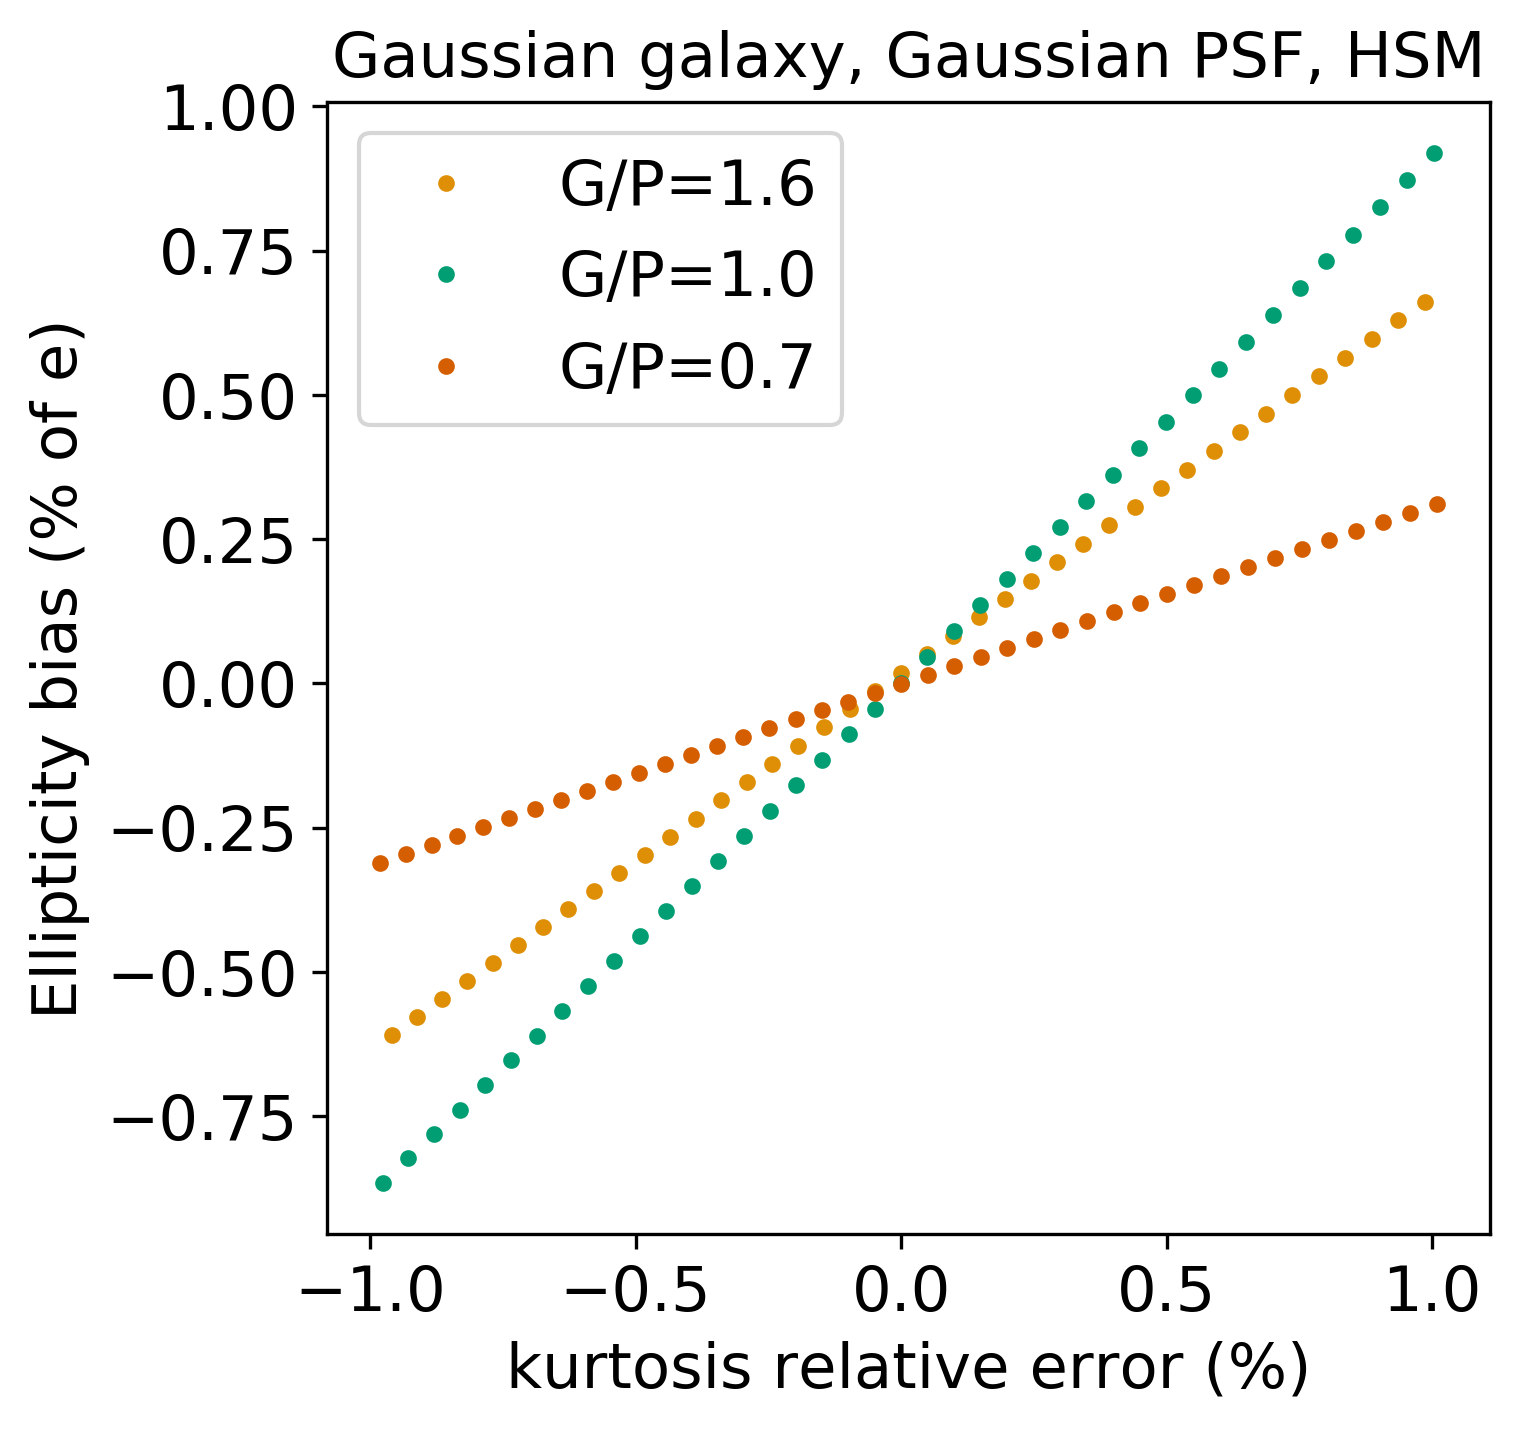

In [17]:
%store -r test2result
%store -r test3result
%store -r test4result

plt.figure(figsize = (5,5))
plt.plot([t['kurtosis_perc_error'] for t in test2result],100*np.array([t["measurement"]/t['e2'] for t in test2result]),'.',label = 'G/P=1.6', color = cmap[1])
plt.plot([t['kurtosis_perc_error'] for t in test3result],100*np.array([t["measurement"]/t['e2'] for t in test3result]),'.',label = 'G/P=1.0', color = cmap[2])
plt.plot([t['kurtosis_perc_error'] for t in test4result],100*np.array([t["measurement"]/t['e2'] for t in test4result]),'.',label = 'G/P=0.7', color = cmap[3])
#plt.plot([t['kurtosis_perc_error'] for t in test2result_mcal],100*np.array([t["measurement"]/t['e2'] for t in test2result_mcal]),'.',label = 'G/P=0.7')

plt.xlabel("kurtosis relative error (%)")
plt.ylabel("Ellipticity bias (% of e)")
plt.legend()
plt.title("Gaussian galaxy, Gaussian PSF, HSM")
plt.show()

Conclusion: 

delta_e is proportional to the error of kurtosis



In [10]:
test5_KSB= [("gaussian" ,5.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'KSB'}) for i in range(15)
    ]+[("gaussian" ,1.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'KSB'}) for i in range(18)]

In [13]:
test5_KSBresult = []
for i in range(len(test5_KSB)):
    test = homesm.PSFSameSecondTest(*test5_KSB[i][:-1],**test5_KSB[i][-1])
    results = test.get_results()
    test5_KSBresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test5_KSB)*100)+"%")

Finished 100.0%


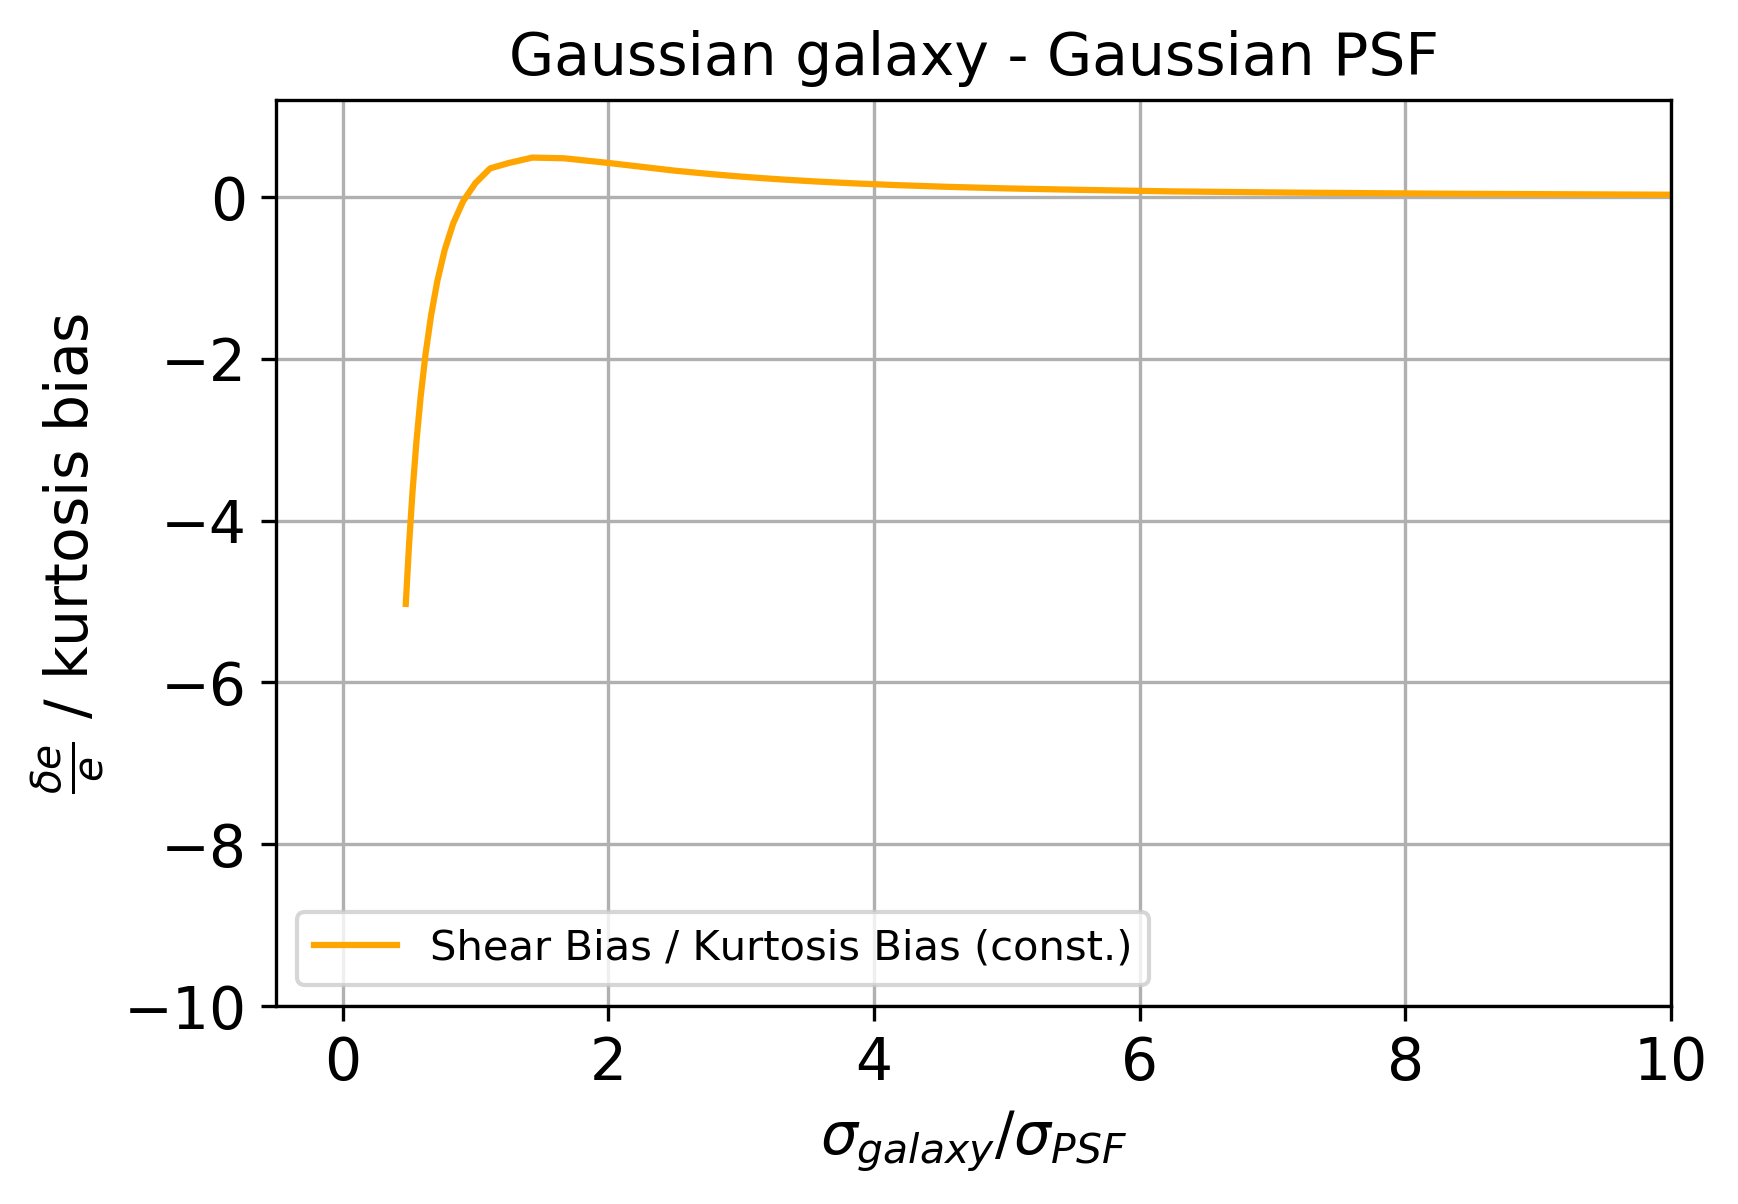

In [14]:
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5_KSBresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5_KSBresult]),label='Shear Bias / Kurtosis Bias (const.)', color = 'orange')
#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5_KSBresult],100*np.array([t["adaptive_prediction_bias"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5_KSBresult]),label='Shear Bias induced by second moments / Kurtosis Bias (const.)', color = 'blue')
#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5_KSBresult],100*np.array([(t["measurement"] -  t["adaptive_prediction_bias"])/(t['e2']*(t['kurtosis_perc_error'])) for t in test5_KSBresult]),label='difference / Kurtosis Bias (const.)', color = 'green')

plt.xlabel(r"$\sigma_{galaxy}/\sigma_{PSF}$")
plt.ylabel(r'$\frac{\delta e}{e}$ / kurtosis bias')
plt.ylim([-10,1.2])
plt.xlim([-0.5,10])
plt.title("Gaussian galaxy - Gaussian PSF")
plt.legend()




plt.grid()
plt.show()

In [20]:
test5_REGAUSS= [("gaussian" ,5.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'REGAUSS'}) for i in range(15)
    ]+[("gaussian" ,1.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'REGAUSS'}) for i in range(18)]

In [21]:
test5_REGAUSSresult = []
for i in range(len(test5_REGAUSS)):
    test = homesm.PSFSameSecondTest(*test5_REGAUSS[i][:-1],**test5_REGAUSS[i][-1])
    results = test.get_results()
    test5_REGAUSSresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test5_REGAUSS)*100)+"%")
%store test5_REGAUSSresult

Finished 100.0%
Stored 'test5_REGAUSSresult' (list)


In [48]:
test5_LINEAR= [("gaussian" ,5.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'LINEAR'}) for i in range(15)
    ]+[("gaussian" ,1.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'LINEAR'}) for i in range(18)]

In [49]:
test5_LINEARresult = []
for i in range(len(test5_LINEAR)):
    test = homesm.PSFSameSecondTest(*test5_LINEAR[i][:-1],**test5_LINEAR[i][-1])
    results = test.get_results()
    test5_LINEARresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test5_LINEAR)*100)+"%")
    
%store test5_LINEARresult

GalSimHSMError: Error: adaptive moment failed


In [39]:
test5_BJ= [("gaussian" ,5.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'BJ'}) for i in range(15)
    ]+[("gaussian" ,1.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'BJ'}) for i in range(18)]

In [40]:
test5_BJresult = []
for i in range(len(test5_BJ)):
    test = homesm.PSFSameSecondTest(*test5_BJ[i][:-1],**test5_BJ[i][-1])
    results = test.get_results()
    test5_BJresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test5_BJ)*100)+"%")

Finished 100.0%


In [22]:
test5mcal_REGAUSS= [("gaussian" ,5.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'REGAUSS','metacal_method':'estimateShear'}) for i in range(15)
    ]+[("gaussian" ,1.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'REGAUSS','metacal_method':'estimateShear'}) for i in range(18)]

In [23]:
test5mcal_REGAUSSresult = []
for i in range(len(test5mcal_REGAUSS)):
    test = homesm.PSFSameSecondTest(*test5mcal_REGAUSS[i][:-1],**test5mcal_REGAUSS[i][-1])
    results = test.get_results(metacal = True)
    test5mcal_REGAUSSresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test5mcal_REGAUSS)*100)+"%")
    
%store test5mcal_REGAUSSresult

Finished 100.0%
Stored 'test5mcal_REGAUSSresult' (list)


In [19]:
test5mcal_LINEAR= [("gaussian" ,5.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'LINEAR','metacal_method':'estimateShear'}) for i in range(15)
    ]+[("gaussian" ,1.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'LINEAR','metacal_method':'estimateShear'}) for i in range(18)]

In [20]:
test5mcal_LINEARresult = []
for i in range(len(test5mcal_LINEAR)):
    test = homesm.PSFSameSecondTest(*test5mcal_LINEAR[i][:-1],**test5mcal_LINEAR[i][-1])
    results = test.get_results(metacal = True)
    test5mcal_LINEARresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test5mcal_LINEAR)*100)+"%")

Finished 100.0%


In [21]:
test5mcal_KSB= [("gaussian" ,5.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'KSB','metacal_method':'estimateShear'}) for i in range(15)
    ]+[("gaussian" ,1.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'hsm_core':'KSB','metacal_method':'estimateShear'}) for i in range(18)]

In [22]:
test5mcal_KSBresult = []
for i in range(len(test5mcal_KSB)):
    test = homesm.PSFSameSecondTest(*test5mcal_KSB[i][:-1],**test5mcal_KSB[i][-1])
    results = test.get_results(metacal = True)
    test5mcal_KSBresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test5mcal_KSB)*100)+"%")

Finished 100.0%


In [24]:
# test17KSB= [("gaussian" ,5.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'KSB',}) for i in range(7)
#     ]+[("gaussian" ,1.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'KSB',}) for i in range(18)]
# test17KSBresult = []
# for i in range(len(test17KSB)):
#     test = homesm.PSFSameSecondTest(*test17KSB[i][:-1],**test17KSB[i][-1])
#     results = test.get_results(metacal = False)
#     test17KSBresult.append(results)
#     clear_output() 
#     print ("Finished "+str(float((i+1))/len(test17KSB)*100)+"%")
# test17LINEAR= [("gaussian" ,5.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'LINEAR',}) for i in range(7)
#     ]+[("gaussian" ,1.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'LINEAR',}) for i in range(18)]
# test17LINEARresult = []
# for i in range(len(test17KSB)):
#     test = homesm.PSFSameSecondTest(*test17LINEAR[i][:-1],**test17LINEAR[i][-1])
#     results = test.get_results(metacal = False)
#     test17LINEARresult.append(results)
#     clear_output() 
#     print ("Finished "+str(float((i+1))/len(test17KSB)*100)+"%")
    
test17REGAUSS= [("gaussian" ,5.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'REGAUSS',}) for i in range(7)
    ]+[("gaussian" ,1.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'REGAUSS',}) for i in range(18)]
test17REGAUSSresult = []
for i in range(len(test17REGAUSS)):
    test = homesm.PSFSameSecondTest(*test17REGAUSS[i][:-1],**test17REGAUSS[i][-1])
    results = test.get_results(metacal = False)
    test17REGAUSSresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test17REGAUSS)*100)+"%")
%store test17REGAUSSresult

Finished 100.0%
Stored 'test17REGAUSSresult' (list)


In [26]:
# test17KSBmcal= [("gaussian" ,5.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'KSB',}) for i in range(7)
#     ]+[("gaussian" ,1.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'KSB',}) for i in range(18)]
# test17KSBmcalresult = []
# for i in range(len(test17KSBmcal)):
#     test = homesm.PSFSameSecondTest(*test17KSBmcal[i][:-1],**test17KSBmcal[i][-1])
#     results = test.get_results(metacal = True)
#     test17KSBmcalresult.append(results)
#     clear_output() 
#     print ("Finished "+str(float((i+1))/len(test17KSBmcal)*100)+"%")
# test17LINEARmcal= [("gaussian" ,5.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'LINEAR',}) for i in range(7)
#     ]+[("gaussian" ,1.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'LINEAR',}) for i in range(18)]
# test17LINEARmcalresult = []
# for i in range(len(test17KSBmcal)):
#     test = homesm.PSFSameSecondTest(*test17LINEARmcal[i][:-1],**test17LINEARmcal[i][-1])
#     results = test.get_results(metacal = True)
#     test17LINEARmcalresult.append(results)
#     clear_output() 
#     print ("Finished "+str(float((i+1))/len(test17KSBmcal)*100)+"%")
    
test17REGAUSSmcal= [("gaussian" ,5.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'REGAUSS',}) for i in range(7)
    ]+[("gaussian" ,1.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2,'hsm_core':'REGAUSS',}) for i in range(18)]
test17REGAUSSmcalresult = []
for i in range(len(test17REGAUSSmcal)):
    test = homesm.PSFSameSecondTest(*test17REGAUSSmcal[i][:-1],**test17REGAUSSmcal[i][-1])
    results = test.get_results(metacal = True)
    test17REGAUSSmcalresult.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test17REGAUSSmcal)*100)+"%")
%store test17REGAUSSmcalresult

Finished 100.0%
Stored 'test17REGAUSSmcalresult' (list)


In [27]:

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('Test_Results/shape_results5&17.pkl', 'w') as f:  # Python 3: open(..., 'wb')
    pickle.dump([test5_REGAUSSresult, test5mcal_REGAUSSresult, test17REGAUSSresult, test17REGAUSSmcalresult], f)


no stored variable test17REGAUSSresult


NameError: name 'test17REGAUSSresult' is not defined

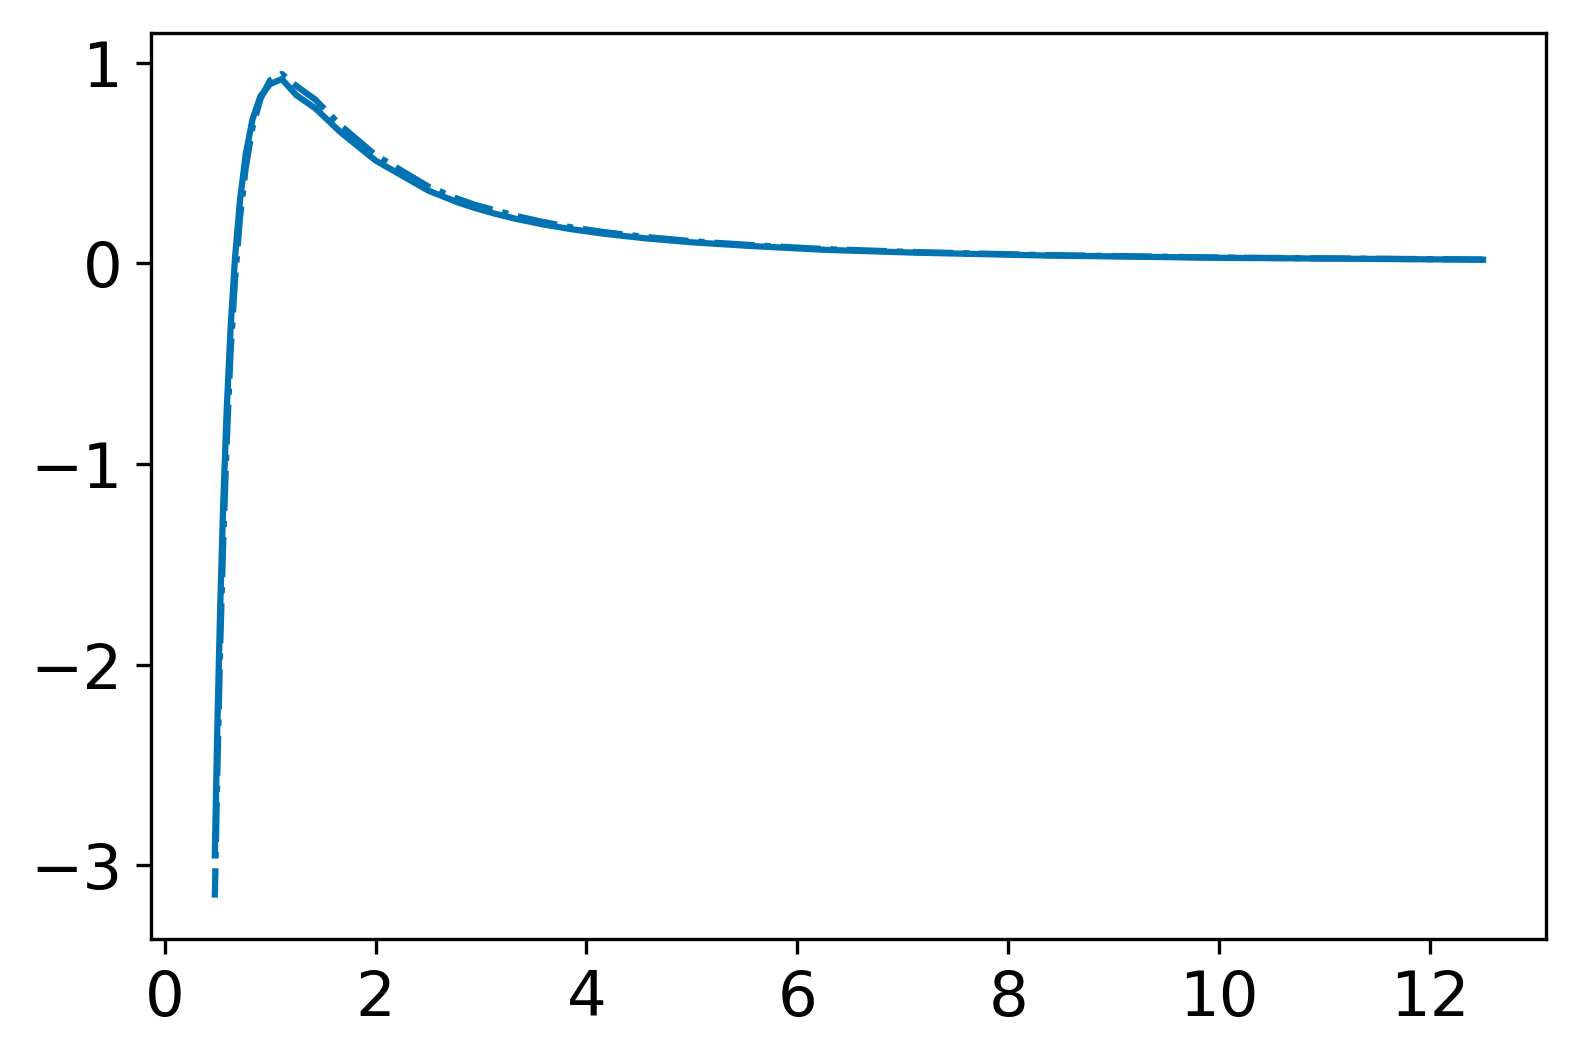

In [19]:

%store -r test5_REGAUSSresult
%store -r test5mcal_REGAUSSresult
#%store -r test17REGAUSSresult



#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5_LINEARresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5_LINEARresult]),label='Gaussian LINEAR', color = cmap[0])
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5_REGAUSSresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5_REGAUSSresult]),label='Gaussian', color = cmap[0])
#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5_KSBresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5_KSBresult]),label='Gaussian KSB',color = cmap[2])

#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5mcal_LINEARresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5mcal_LINEARresult]),'-.', color = cmap[0])
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5mcal_REGAUSSresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5mcal_REGAUSSresult]),'-.', color = cmap[0])
#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5mcal_KSBresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5mcal_KSBresult]),'-.', color = cmap[2])

#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test17LINEARresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test17LINEARresult]),label='Kolmogorov LINEAR', color = cmap[3])
#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test17REGAUSSresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test17KSBresult]),label='Kolmogorov KSB', color = cmap[4])
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test17REGAUSSresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test17REGAUSSresult]),label='Kolmogorov', color = cmap[1])

#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test17LINEARmcalresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test17LINEARmcalresult]),'-.',color = cmap[3])
#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test17REGAUSSmcalresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test17KSBmcalresult]), '-.',color = cmap[4])
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test17REGAUSSmcalresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test17REGAUSSmcalresult]), '-.',color = cmap[1])




#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test6result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test6result]),label='Regauss Double pixel size')

plt.xlabel(r"$\sigma_{galaxy}/\sigma_{PSF}$")
plt.ylabel(r'$m/ B[\rho^{(4)}]$ ')
plt.ylim([-2.0,1.5])
plt.xlim([-0.5,10])
plt.title("Gaussian galaxy - Gaussian or Kolmogorov PSF")
plt.legend()




plt.grid()
plt.show()

Conclusion:

1. The galaxy_sigma/PSF_sigma dependence is independent of the absolute size of PSF / galaxy

Comments:

1. At G/P goes to infinity, PSF is small enough to be ignored

2. For a real PSF with kurtosis larger than the model PSF, we are deconvolving the image from a 'less flat' PSF.  


In [6]:
test7=[("gaussian" ,5.0    ,0.0,0.01,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51}) for i in range(15)
    ]+ [("gaussian" ,1.0    ,0.0,0.01,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51}) for i in range(18)
      ]
test7result = []
for i in range(len(test7)):
    test = homesm.PSFSameSecondTest(*test7[i][:-1],**test7[i][-1])
    results = test.get_results()
    test7result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test7)*100)+"%")

Finished 100.0%


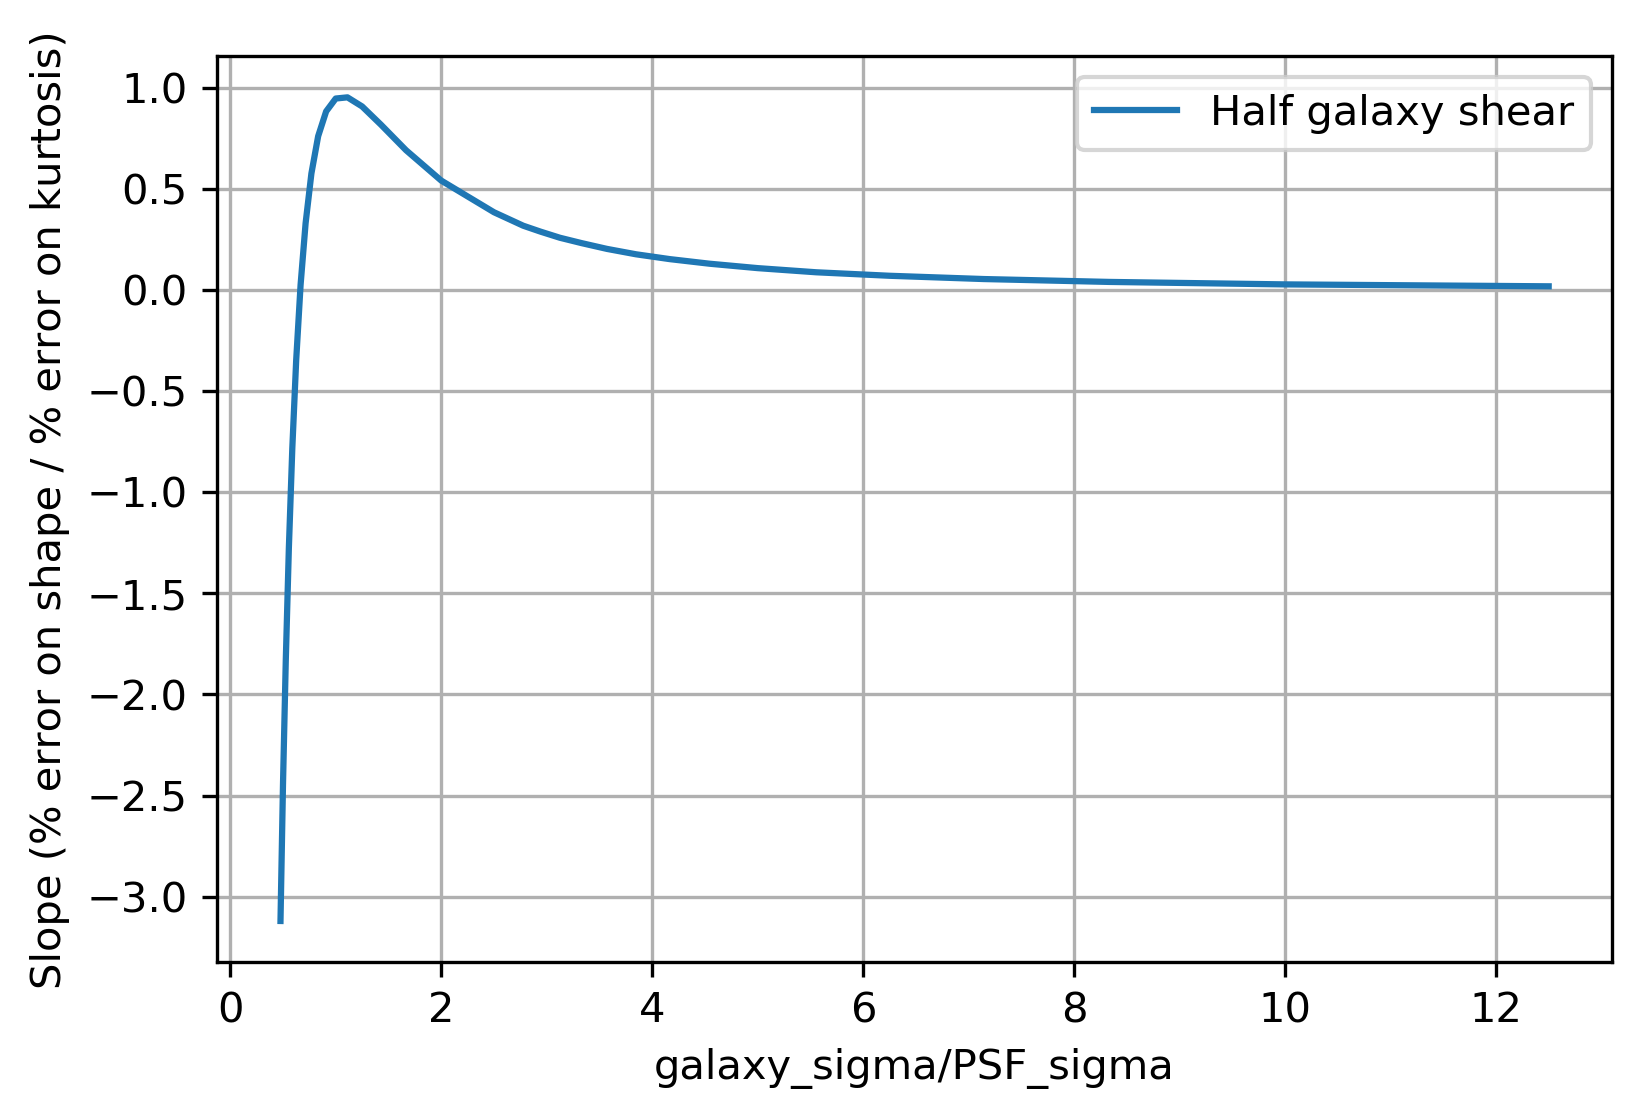

In [8]:
#plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5_REGAUSSresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5_REGAUSSresult]),label='Original')
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test7result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test7result]),label='Half galaxy shear')
plt.xlabel("galaxy_sigma/PSF_sigma")
plt.ylabel("Slope (% error on shape / % error on kurtosis)")
plt.legend()




plt.grid()
plt.show()

Conclusion:

The size dependence of the bias is independent of the galaxy shape

In [169]:
test8= [("sersic" ,1.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'sersicn':0.6}) for i in range(18)
      ]
test8result = []
for i in range(len(test8)):
    test = PSFSameSecondTest(*test8[i][:-1],**test8[i][-1])
    results = test.get_results()
    test8result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test8)*100)+"%")

Finished 100.0%


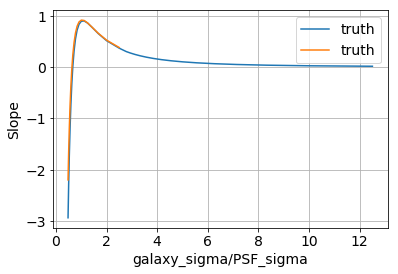

In [170]:
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5result]),label='truth')
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test8result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test8result]),label='truth')

plt.xlabel("galaxy_sigma/PSF_sigma")
plt.ylabel("Slope")
plt.legend()




plt.grid()
plt.show()

In [9]:
gaussian_results = []

for j in range(4):
    this_test = [("sersic" ,0.4 + 0.1*i    ,0.0,0.28,"sersic"  ,0.8     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.49,'sersicn':0.5+1.0*j,'metacal_method':'estimateShear','pixel_scale':0.1}) for i in range(20)
      ]
    this_result = do_tests(this_test)
    gaussian_results.append(this_result)
    #plt.plot([t['gal_sigma']/t['psf_sigma'] for t in this_result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in this_result]),label='sersic index for galaxy is'+str(this_result[0]['sersicn']))

%store gaussian_results


Finished 5.0%
Finished 10.0%
Finished 15.0%
Finished 20.0%
Finished 25.0%
Finished 30.0%
Finished 35.0%
Finished 40.0%
Finished 45.0%
Finished 50.0%
Finished 55.0%
Finished 60.0%
Finished 65.0%
Finished 70.0%
Finished 75.0%
Finished 80.0%
Finished 85.0%
Finished 90.0%
Finished 95.0%
Finished 100.0%
Finished 5.0%
Finished 10.0%
Finished 15.0%
Finished 20.0%
Finished 25.0%
Finished 30.0%
Finished 35.0%
Finished 40.0%
Finished 45.0%
Finished 50.0%
Finished 55.0%
Finished 60.0%
Finished 65.0%
Finished 70.0%
Finished 75.0%
Finished 80.0%
Finished 85.0%
Finished 90.0%
Finished 95.0%
Finished 100.0%
Finished 5.0%
Finished 10.0%
Finished 15.0%
Finished 20.0%
Finished 25.0%
Finished 30.0%
Finished 35.0%
Finished 40.0%
Finished 45.0%
Finished 50.0%
Finished 55.0%
Finished 60.0%
Finished 65.0%
Finished 70.0%
Finished 75.0%
Finished 80.0%
Finished 85.0%
Finished 90.0%
Finished 95.0%
Finished 100.0%
Finished 5.0%
Finished 10.0%
Finished 15.0%
Finished 20.0%
Finished 25.0%
Finished 30.0%
Finished 35

In [9]:
#Test 20

kolmogorov_results = []

for j in range(4):
    this_test = [("sersic" ,1.2    ,0.0,0.05,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'mod_kol_radius_ratio':1.05,'sersicn':0.5+1*j,'metacal_method':'estimateShear','pixel_scale':0.1}) for i in range(20)
      ]
    this_result = do_tests(this_test)
    kolmogorov_results.append(this_result)
    #plt.plot([t['gal_sigma']/t['psf_sigma'] for t in this_result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in this_result]),label='sersic index for galaxy is'+str(this_result[0]['sersicn']))

# plt.xlabel(r"$\sigma_{galaxy}/\sigma_{PSF}$")
# plt.ylabel(r'$\frac{\delta e}{e}$ / kurtosis bias')
# plt.title("Sersic galaxies, Kolmogorov PSF")
# plt.legend()

%store kolmogorov_results



# plt.grid()
# plt.show()

Finished 5.0%
Finished 10.0%
Finished 15.0%
Finished 20.0%
Finished 25.0%
Finished 30.0%
Finished 35.0%
Finished 40.0%
Finished 45.0%
Finished 50.0%
Finished 55.0%
Finished 60.0%
Finished 65.0%
Finished 70.0%
Finished 75.0%
Finished 80.0%
Finished 85.0%
Finished 90.0%
Finished 95.0%
Finished 100.0%
Finished 5.0%
Finished 10.0%
Finished 15.0%
Finished 20.0%
Finished 25.0%
Finished 30.0%
Finished 35.0%
Finished 40.0%
Finished 45.0%
Finished 50.0%
Finished 55.0%
Finished 60.0%
Finished 65.0%
Finished 70.0%
Finished 75.0%
Finished 80.0%
Finished 85.0%
Finished 90.0%
Finished 95.0%
Finished 100.0%
Finished 5.0%
Finished 10.0%
Finished 15.0%
Finished 20.0%
Finished 25.0%
Finished 30.0%
Finished 35.0%
Finished 40.0%
Finished 45.0%
Finished 50.0%
Finished 55.0%
Finished 60.0%
Finished 65.0%
Finished 70.0%
Finished 75.0%
Finished 80.0%
Finished 85.0%
Finished 90.0%
Finished 95.0%
Finished 100.0%
Finished 5.0%
Finished 10.0%
Finished 15.0%
Finished 20.0%
Finished 25.0%
Finished 30.0%
Finished 35

In [40]:
with open('Test_Results/shape_gaussian_results.pkl','w') as f:
    pickle.dump(gaussian_results,f)

In [43]:
print len(gaussian_results[0])

20


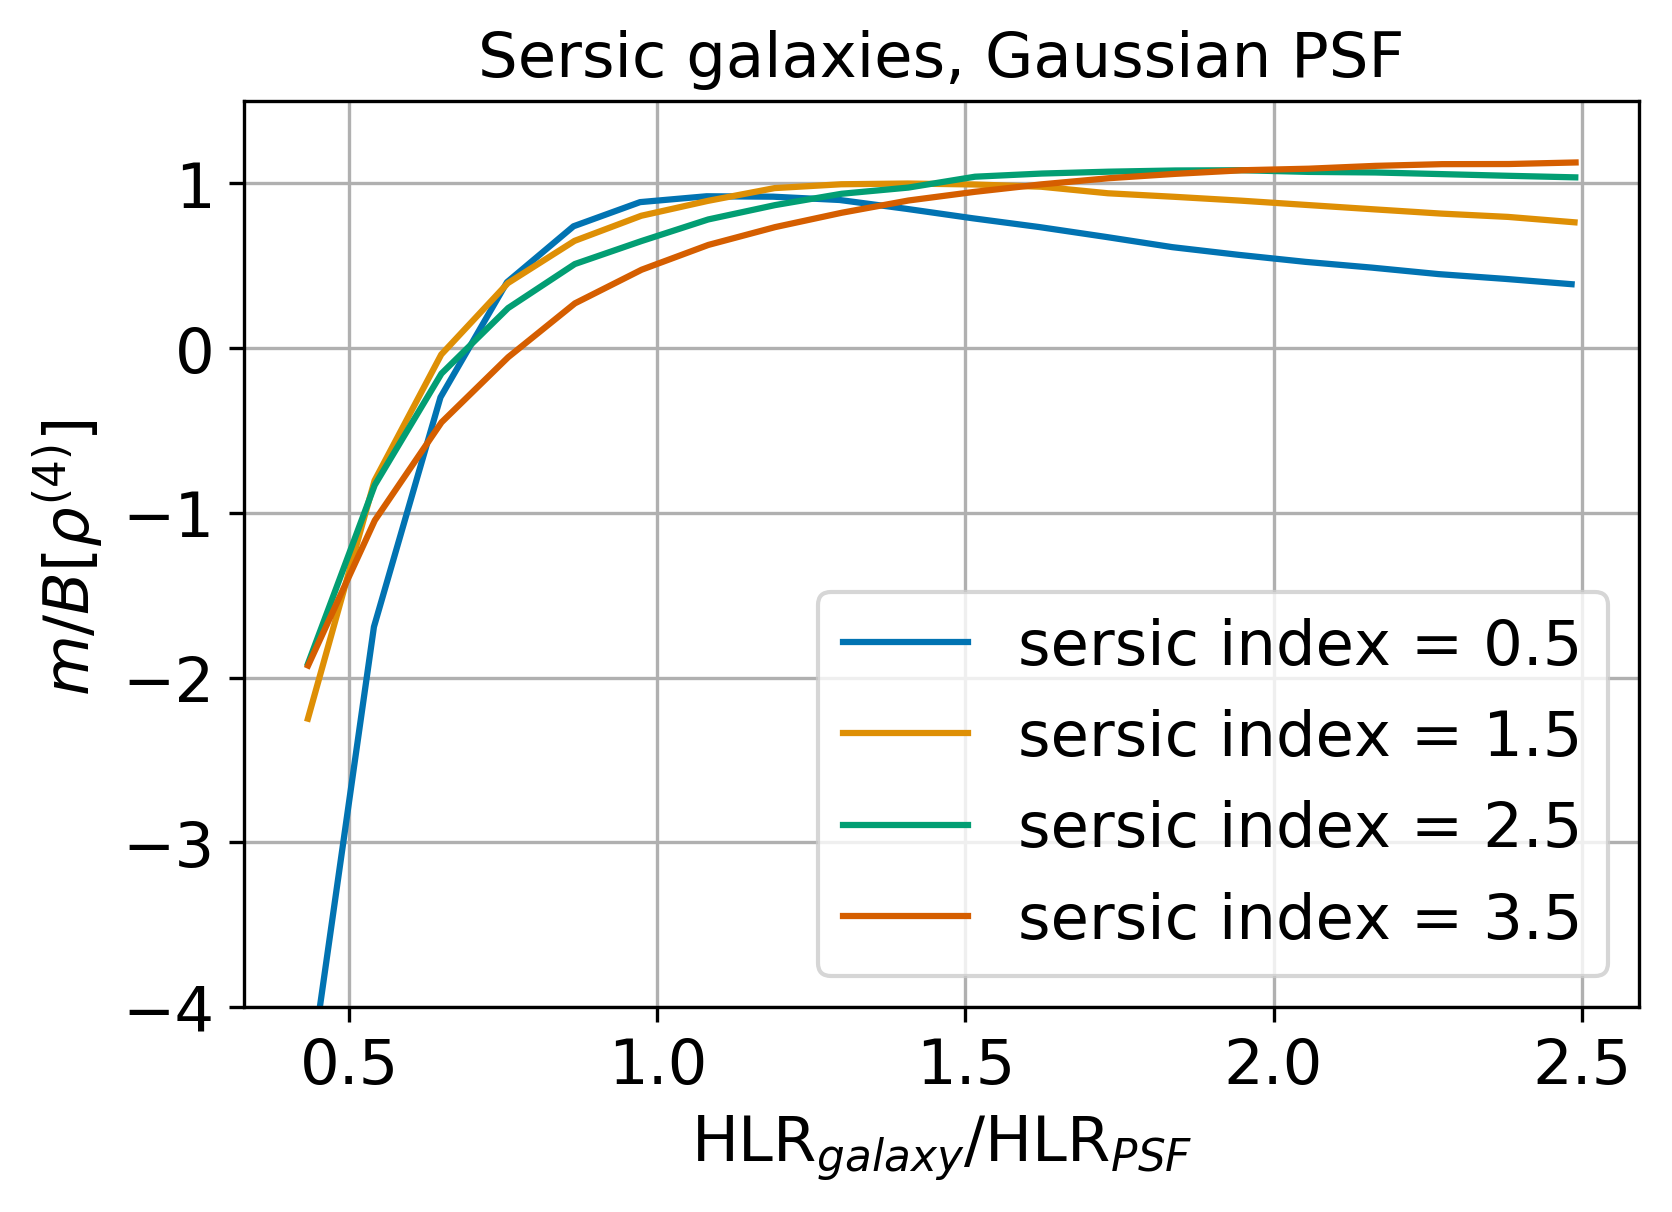

In [39]:
%store -r gaussian_results
for j in range(4):
    
    #cmap = plt.get_cmap('tab10')
    
    plt.plot([t['gal_hlr']/t['psf_hlr'] for t in gaussian_results[j]],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in gaussian_results[j]]),label='sersic index = '+str(gaussian_results[j][0]['sersicn']),color = cmap[j] )
    #plt.plot([t['gal_sigma']/t['psf_sigma'] for t in kolmogorov_results[j]],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in kolmogorov_results[j]]),'-.',color = cmap[j])
#plt.rc('legend', fontsize=8)    # legend fontsize

plt.xlabel(r"HLR$_{galaxy}/$HLR$_{PSF}$")

plt.ylabel(r'$m/ B[\rho^{(4)}]$ ')
plt.title("Sersic galaxies, Gaussian PSF")
plt.ylim([-4,1.5])
plt.legend()




plt.grid()
plt.show()



In [13]:
cmap

In [35]:
cmap = plt.get_cmap('tab10')
print cmap.colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))


Finished 100.0%


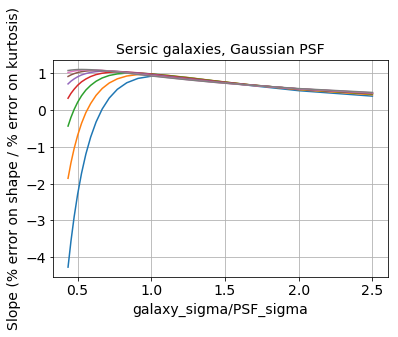

In [370]:
#Investigate the method to change kurtosis

for j in range(8):
    this_test = [("sersic" ,0.5    ,0.0,0.28,"sersic"  ,0.2+0.05*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.49,'sersicn':0.5+0.3*j}) for i in range(20)
      ]
    this_result = do_tests(this_test)
    plt.plot([t['gal_sigma']/t['psf_sigma'] for t in this_result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in this_result]),label='sersic index for galaxy is'+str(this_result[0]['sersicn']))

plt.xlabel(r"$\sigma_{galaxy}/\sigma_{PSF}$")
plt.ylabel(r'$\frac{\delta e}{e}$ / kurtosis bias')
plt.title("Sersic galaxies, Gaussian PSF")
#plt.legend()




plt.grid()
plt.show()


Finished 100.0%


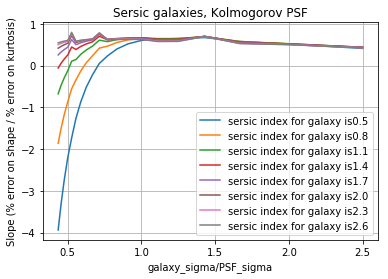

In [28]:
#Test 19

for j in range(8):
    this_test = [("sersic" ,1.0    ,0.0,0.28,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'mod_kol_radius_ratio':1.2,'sersicn':0.5+0.3*j}) for i in range(20)
      ]
    this_result = do_tests(this_test)
    plt.plot([t['gal_sigma']/t['psf_sigma'] for t in this_result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in this_result]),label='sersic index for galaxy is'+str(this_result[0]['sersicn']))

plt.xlabel("galaxy_sigma/PSF_sigma")
plt.ylabel("Slope (% error on shape / % error on kurtosis)")
plt.title("Sersic galaxies, Kolmogorov PSF")
plt.legend()




plt.grid()
plt.show()

Finished 100.0%


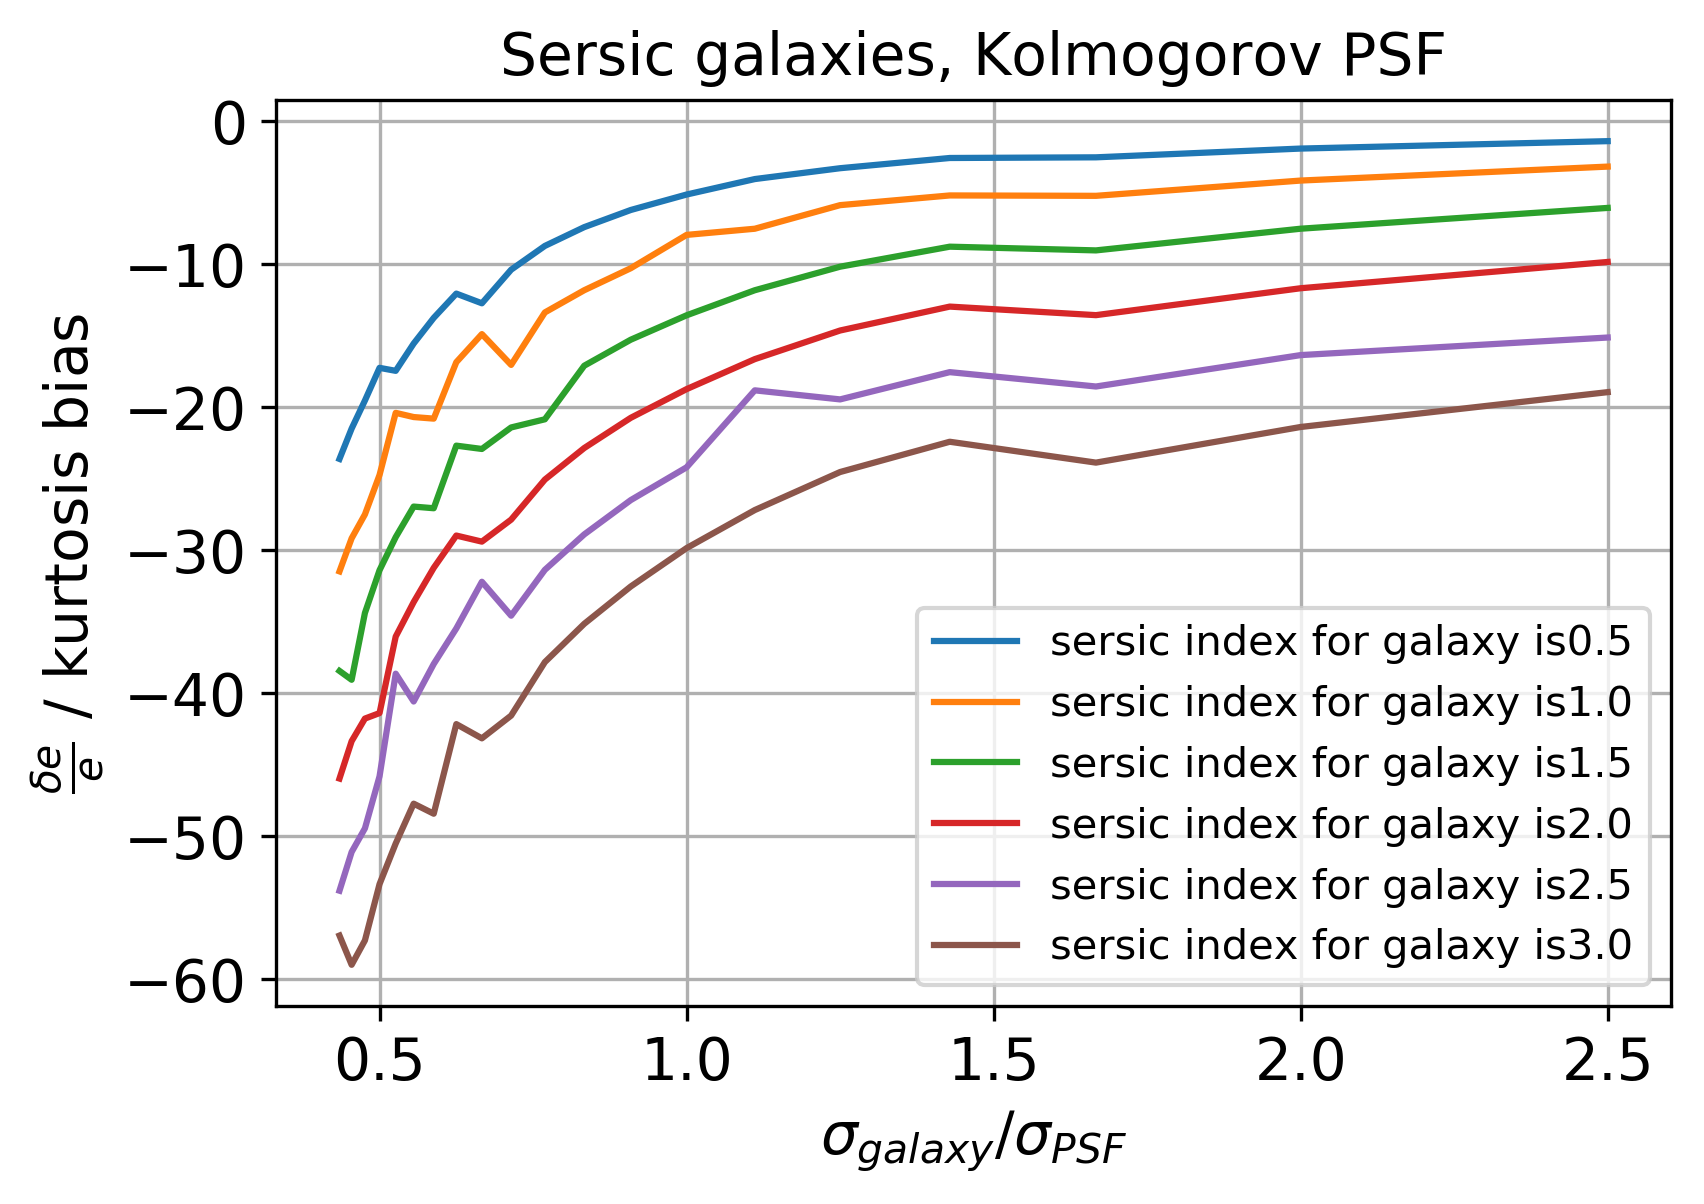

In [39]:
#Test 20
for j in range(6):
    this_test = [("sersic" ,1.0    ,0.0,0.28,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'mod_kol_radius_ratio':1.1,'sersicn':0.5+0.5*j,'metacal_method':'estimateShear'}) for i in range(20)
      ]
    this_result = do_tests(this_test)
    plt.plot([t['gal_sigma']/t['psf_sigma'] for t in this_result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in this_result]),label='sersic index for galaxy is'+str(this_result[0]['sersicn']))

plt.xlabel(r"$\sigma_{galaxy}/\sigma_{PSF}$")
plt.ylabel(r'$\frac{\delta e}{e}$ / kurtosis bias')
plt.title("Sersic galaxies, Kolmogorov PSF")
plt.legend()




plt.grid()
plt.show()

In [28]:
# different type of galaxy and different type of psf light profile, but with 2.0 gal_sig and 0.6 psf_sig
#       gal_type   ,gal_sig,e1 ,e2 , psf_type    ,psf_sig,SE   ,optionals    
test9= [("gaussian" ,0.5    ,0.0,0.28,"sersic"  ,0.3     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5}) for i in range(41)
      ]

In [29]:
test9result = []
for i in range(len(test9)):
    test = homesm.PSFSameSecondTest(*test9[i][:-1],**test9[i][-1])
    results = test.get_results(metacal = True)
    test9result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test9)*100)+"%")
xlisttest9 = np.array([t['kurtosis_perc_error'] for t in test9result])
ylisttest9 = 100*np.array([t["measurement"]/t['e2'] for t in test9result])
poly9 = np.polyfit(xlisttest9,ylisttest9,1)
yfit9 = poly9[0]*xlisttest9+poly9[1] 

%store test9result

Finished 100.0%
Stored 'test9result' (list)


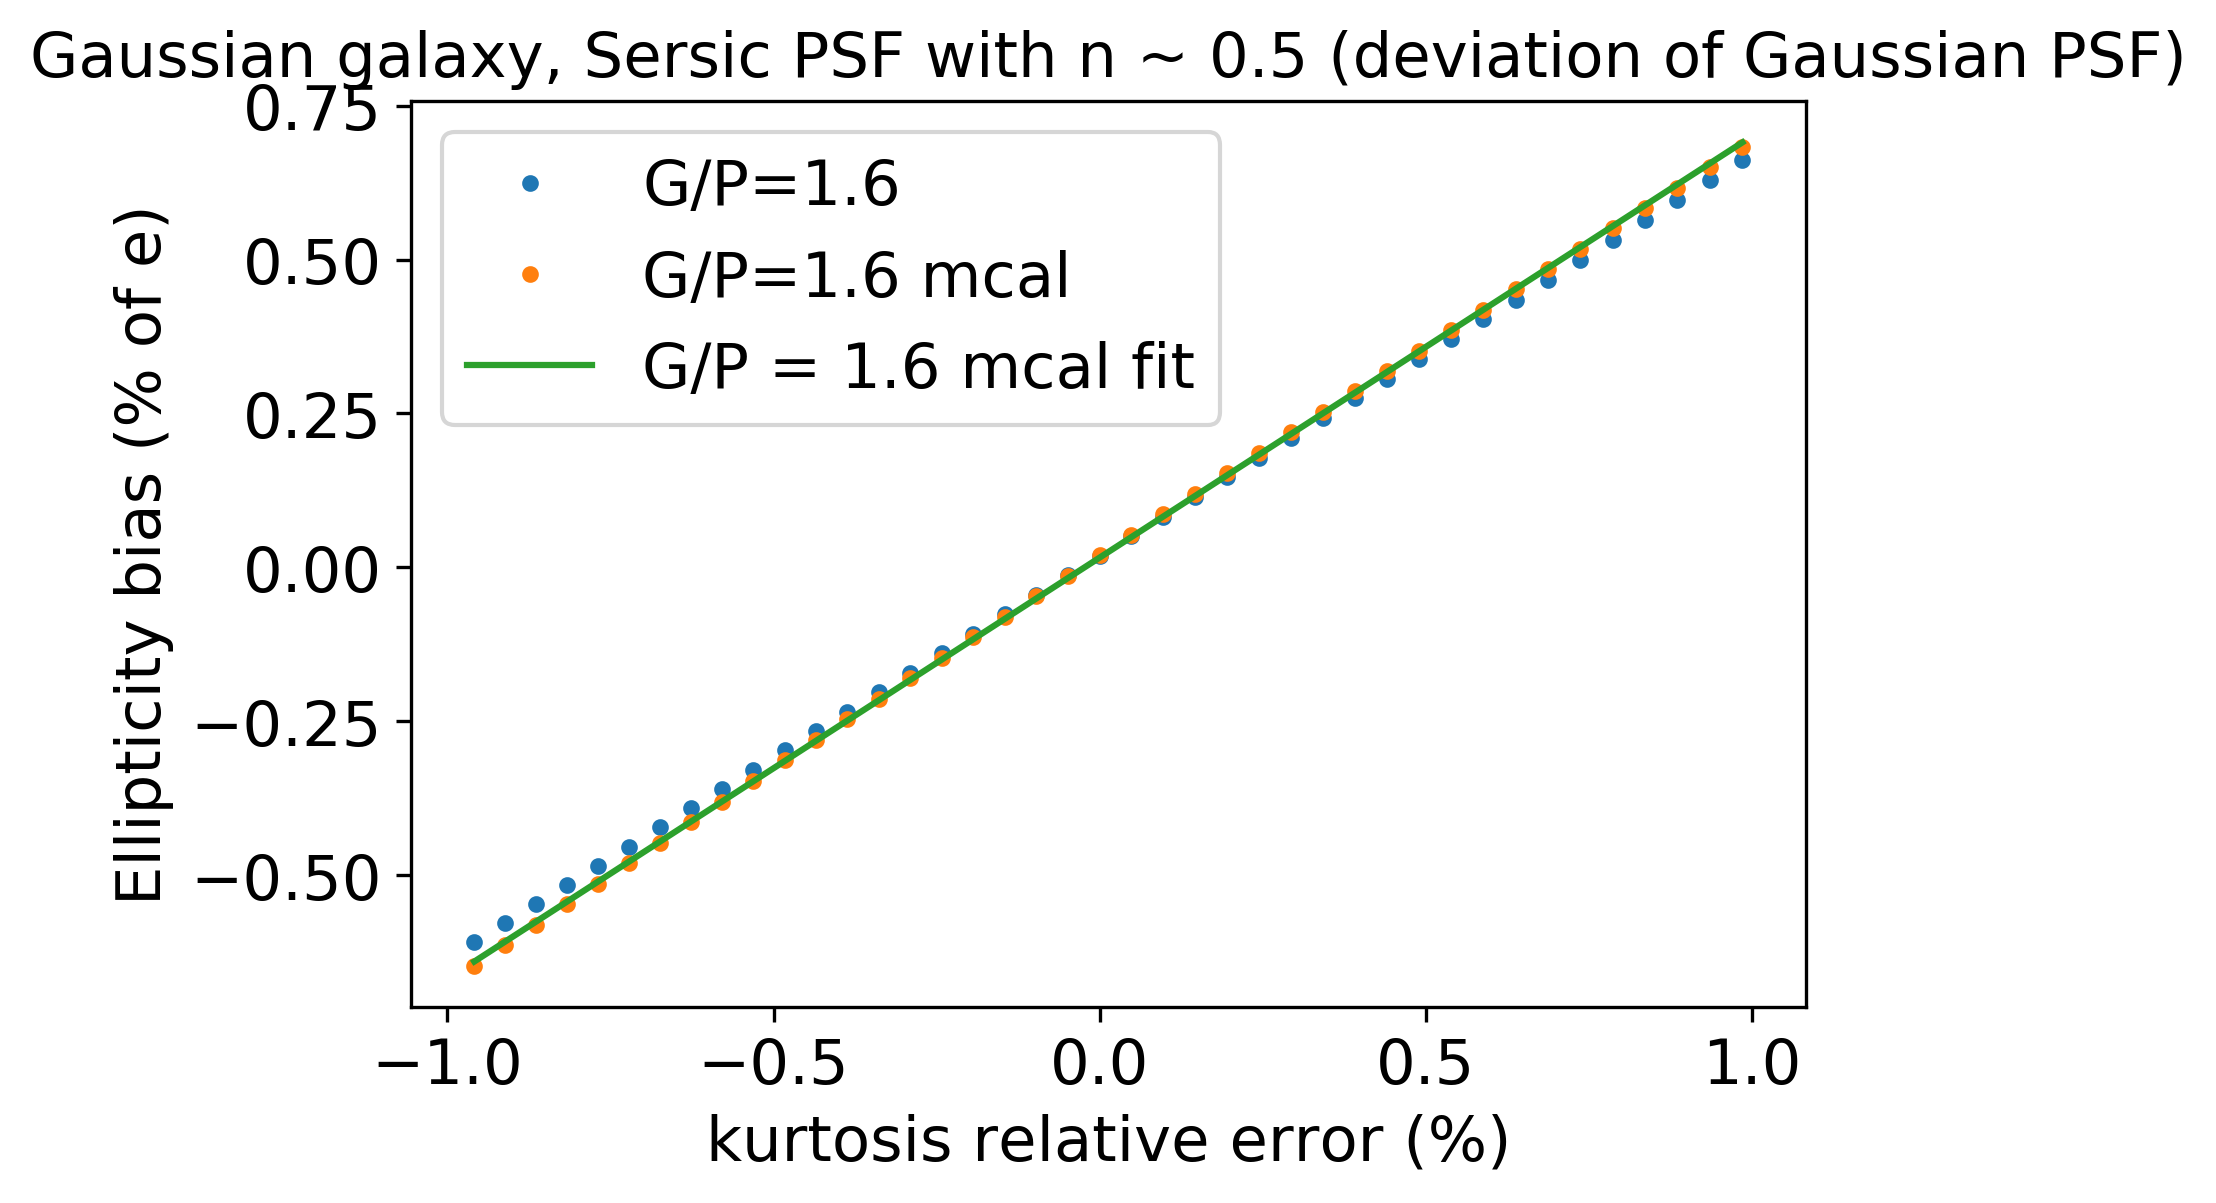

In [30]:
plt.plot([t['kurtosis_perc_error'] for t in test2result],100*np.array([t["measurement"]/t['e2'] for t in test2result]),'.',label = 'G/P=1.6')
plt.plot([t['kurtosis_perc_error'] for t in test9result],100*np.array([t["measurement"]/t['e2'] for t in test9result]),'.',label = 'G/P=1.6 mcal')
plt.plot(xlisttest9,yfit9,label='G/P = 1.6 mcal fit')
plt.xlabel("kurtosis relative error (%)")
plt.ylabel("Ellipticity bias (% of e)")
plt.legend()
plt.title("Gaussian galaxy, Sersic PSF with n ~ 0.5 (deviation of Gaussian PSF)")
plt.show()

In [31]:
# different type of galaxy and different type of psf light profile, but with 2.0 gal_sig and 0.6 psf_sig
#       gal_type   ,gal_sig,e1 ,e2 , psf_type    ,psf_sig,SE   ,optionals    
test10= [("gaussian" ,0.5    ,0.0,0.28,"sersic"  ,0.5     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5}) for i in range(41)
      ]

In [32]:
test10result = []
for i in range(len(test10)):
    test = homesm.PSFSameSecondTest(*test10[i][:-1],**test10[i][-1])
    results = test.get_results(metacal = True)
    test10result.append(results)
    #clear_output() 
    print ("Finished "+str(float((i+1))/len(test10)*100)+"%")
xlisttest10 = np.array([t['kurtosis_perc_error'] for t in test10result])
ylisttest10 = 100*np.array([t["measurement"]/t['e2'] for t in test10result])
poly10 = np.polyfit(xlisttest10,ylisttest10,1)
yfit10 = poly10[0]*xlisttest10+poly10[1] 
%store test10result

Finished 2.43902439024%
Finished 4.87804878049%
Finished 7.31707317073%
Finished 9.75609756098%
Finished 12.1951219512%
Finished 14.6341463415%
Finished 17.0731707317%
Finished 19.512195122%
Finished 21.9512195122%
Finished 24.3902439024%
Finished 26.8292682927%
Finished 29.2682926829%
Finished 31.7073170732%
Finished 34.1463414634%
Finished 36.5853658537%
Finished 39.0243902439%
Finished 41.4634146341%
Finished 43.9024390244%
Finished 46.3414634146%
Finished 48.7804878049%
Finished 51.2195121951%
Finished 53.6585365854%
Finished 56.0975609756%
Finished 58.5365853659%
Finished 60.9756097561%
Finished 63.4146341463%
Finished 65.8536585366%
Finished 68.2926829268%
Finished 70.7317073171%
Finished 73.1707317073%
Finished 75.6097560976%
Finished 78.0487804878%
Finished 80.487804878%
Finished 82.9268292683%
Finished 85.3658536585%
Finished 87.8048780488%
Finished 90.243902439%
Finished 92.6829268293%
Finished 95.1219512195%
Finished 97.5609756098%
Finished 100.0%
Stored 'test10result' (list

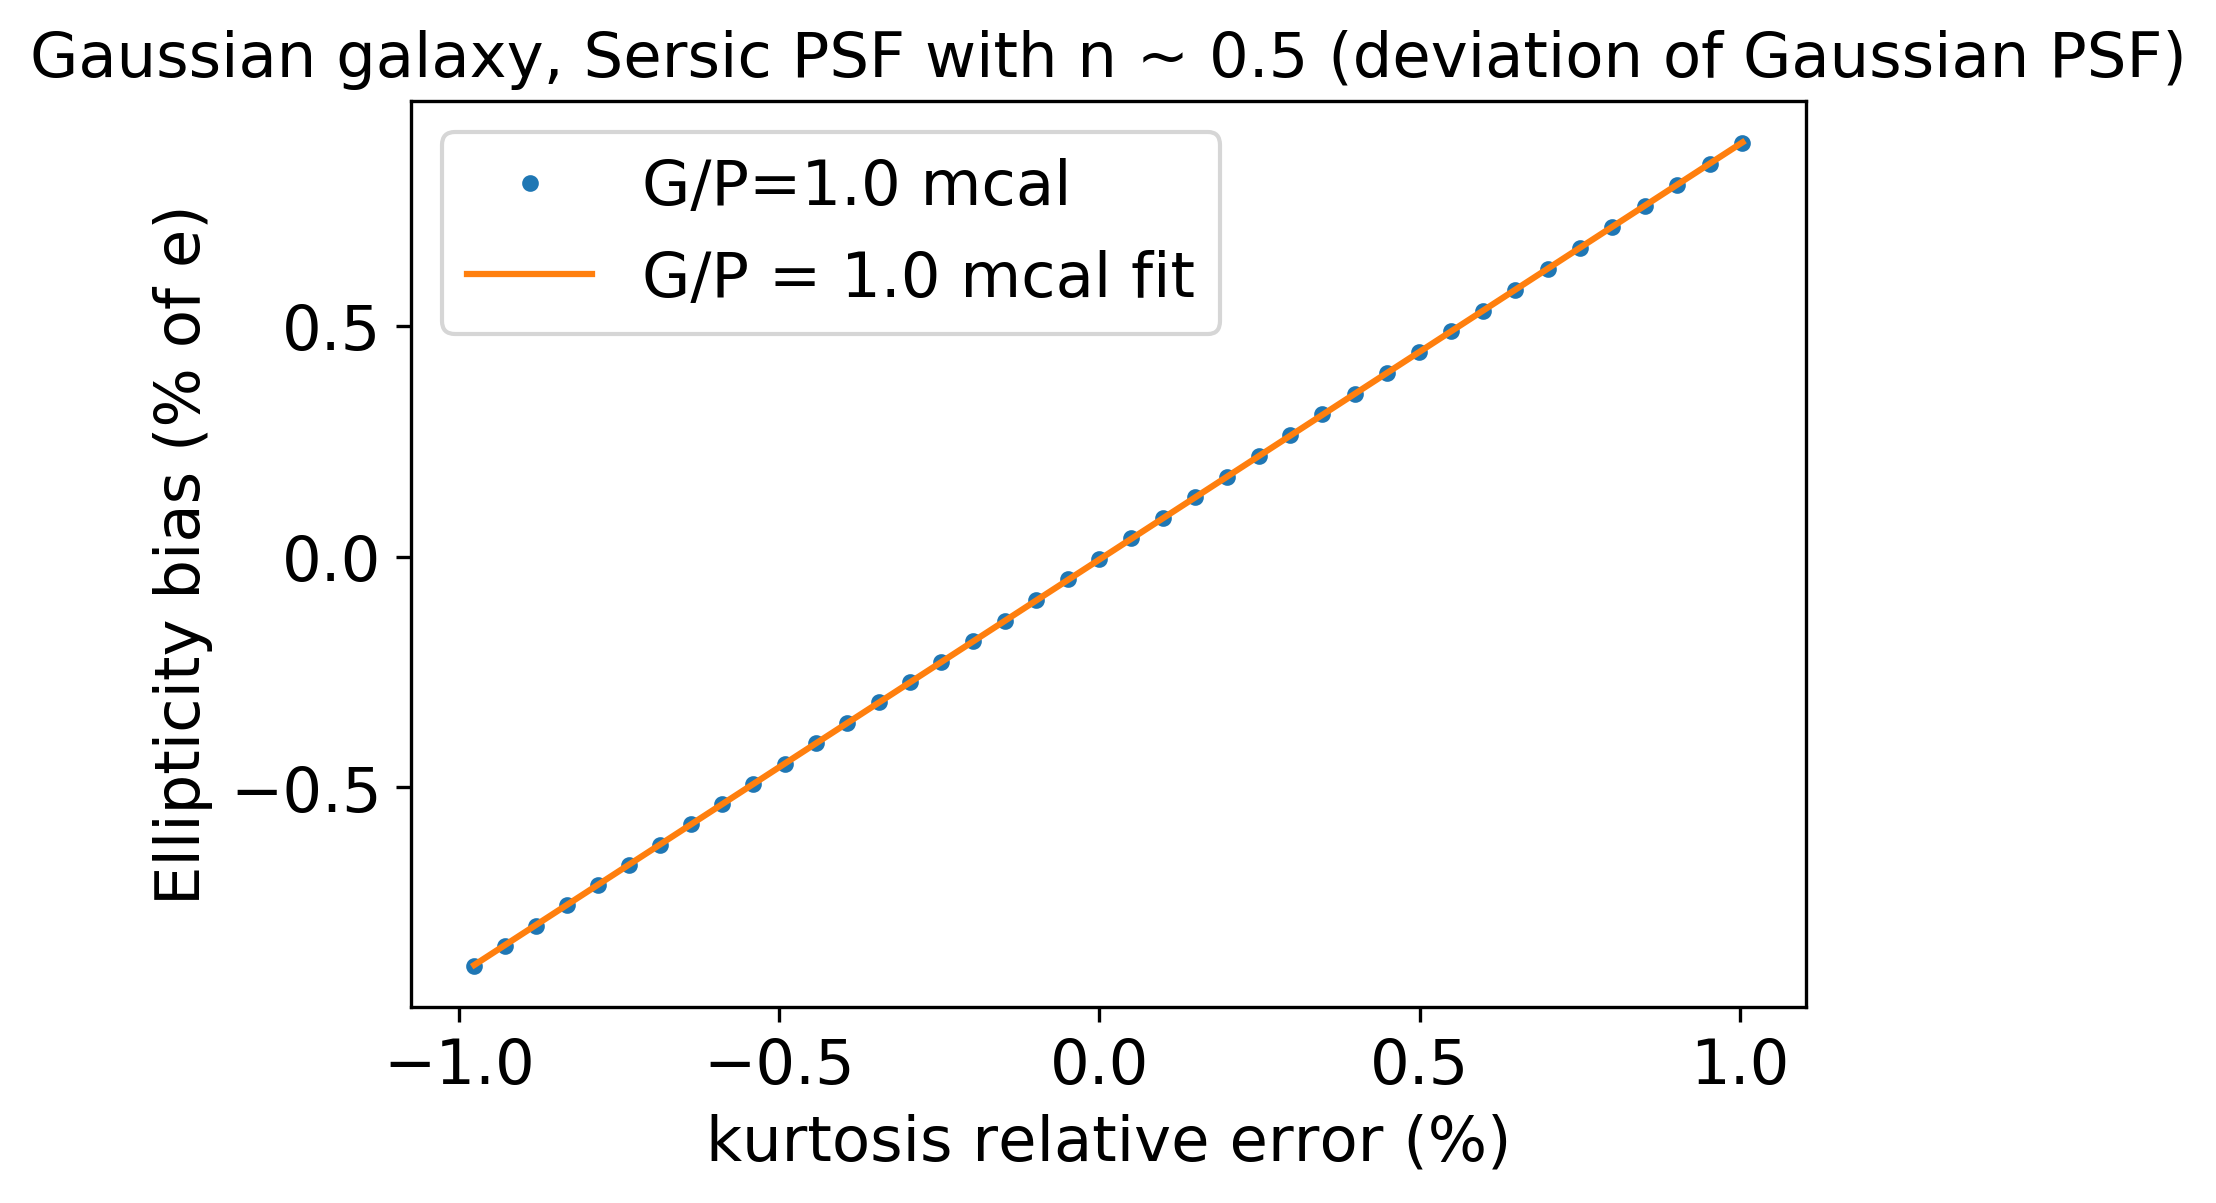

In [33]:
#plt.plot([t['kurtosis_perc_error'] for t in test3result],100*np.array([t["measurement"]/t['e2'] for t in test3result]),'.',label = 'G/P=1.0')
plt.plot([t['kurtosis_perc_error'] for t in test10result],100*np.array([t["measurement"]/t['e2'] for t in test10result]),'.',label = 'G/P=1.0 mcal')
plt.plot(xlisttest10,yfit10,label='G/P = 1.0 mcal fit')
plt.xlabel("kurtosis relative error (%)")
plt.ylabel("Ellipticity bias (% of e)")
plt.legend()
plt.title("Gaussian galaxy, Sersic PSF with n ~ 0.5 (deviation of Gaussian PSF)")
plt.show()

In [34]:
# different type of galaxy and different type of psf light profile, but with 2.0 gal_sig and 0.6 psf_sig
#       gal_type   ,gal_sig,e1 ,e2 , psf_type    ,psf_sig,SE   ,optionals    
test11= [("gaussian" ,0.5    ,0.0,0.28,"sersic"  ,0.7     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5}) for i in range(41)
      ]

In [35]:
test11result = []
for i in range(len(test11)):
    test = homesm.PSFSameSecondTest(*test11[i][:-1],**test11[i][-1])
    results = test.get_results(metacal = True)
    test11result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test10)*100)+"%")
xlisttest11 = np.array([t['kurtosis_perc_error'] for t in test11result])
ylisttest11 = 100*np.array([t["measurement"]/t['e2'] for t in test11result])
poly11 = np.polyfit(xlisttest11,ylisttest11,1)
yfit11 = poly11[0]*xlisttest11+poly11[1]    
%store test11result

Finished 100.0%
Stored 'test11result' (list)


In [36]:
with open('Test_Results/results9-11fits.pkl', 'w') as f:  # Python 3: open(..., 'wb')
    pickle.dump([xlisttest9,yfit9, xlisttest10,yfit10, xlisttest11,yfit11], f)


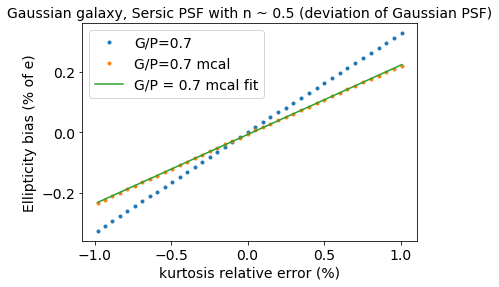

In [281]:
plt.plot([t['kurtosis_perc_error'] for t in test4result],100*np.array([t["measurement"]/t['e2'] for t in test4result]),'.',label = 'G/P=0.7')
plt.plot([t['kurtosis_perc_error'] for t in test11result],100*np.array([t["measurement"]/t['e2'] for t in test11result]),'.',label = 'G/P=0.7 mcal')
plt.plot(xlisttest11,yfit11,label='G/P = 0.7 mcal fit')
plt.xlabel("kurtosis relative error (%)")
plt.ylabel("Ellipticity bias (% of e)")
plt.legend()
plt.title("Gaussian galaxy, Sersic PSF with n ~ 0.5 (deviation of Gaussian PSF)")
plt.show()

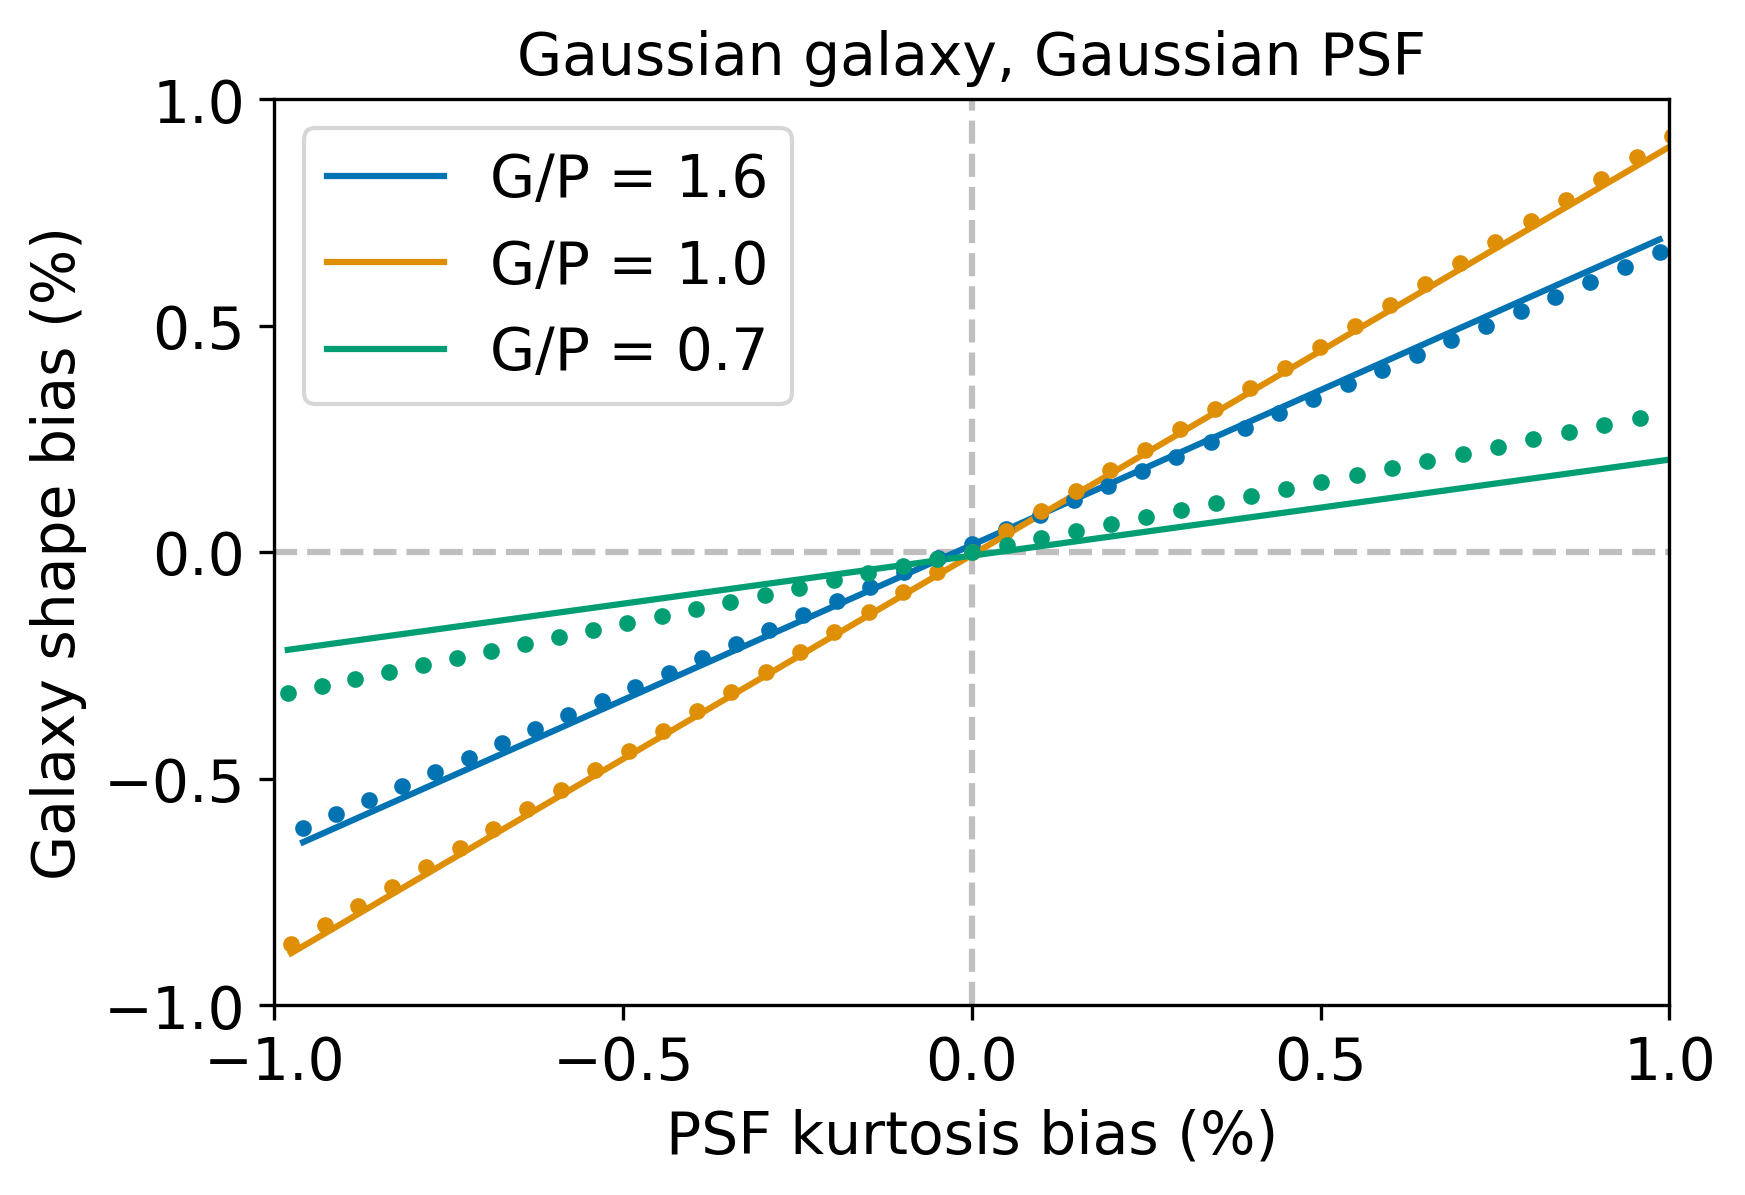

In [46]:
#plt.figure(figsize = (7,5))



plt.plot([-1.0,1.0], [-0.0,0.0], '--',color = 'grey',alpha = 0.5)
plt.plot([0.0,0.0], [-1.0,1.0], '--',color = 'grey',alpha = 0.5)

plt.plot(xlisttest9,yfit9,label='G/P = 1.6',color = cmap[0])
plt.plot(xlisttest10,yfit10,label='G/P = 1.0',color = cmap[1])
plt.plot(xlisttest11,yfit11,label='G/P = 0.7', color = cmap[2])

plt.plot([t['kurtosis_perc_error'] for t in test2result],100*np.array([t["measurement"]/t['e2'] for t in test2result]),'.',color = cmap[0])
plt.plot([t['kurtosis_perc_error'] for t in test3result],100*np.array([t["measurement"]/t['e2'] for t in test3result]),'.',color = cmap[1])
plt.plot([t['kurtosis_perc_error'] for t in test4result],100*np.array([t["measurement"]/t['e2'] for t in test4result]),'.',color = cmap[2])

plt.xlabel("PSF kurtosis bias (%)")
plt.ylabel("Galaxy shape bias (%)")

plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

plt.legend()
plt.title("Gaussian galaxy, Gaussian PSF")
plt.show()



In [22]:
test12= [("gaussian" ,5.0    ,0.0,0.28,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5}) for i in range(15)
    ]+[("gaussian" ,2.0    ,0.0,0.28,"sersic"  ,0.8+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5}) for i in range(18)]

In [23]:
test12result = []
for i in range(len(test12)):
    test = homesm.PSFSameSecondTest(*test12[i][:-1],**test12[i][-1])
    results = test.get_results(metacal = True)
    test12result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test12)*100)+"%")
    

Finished 100.0%


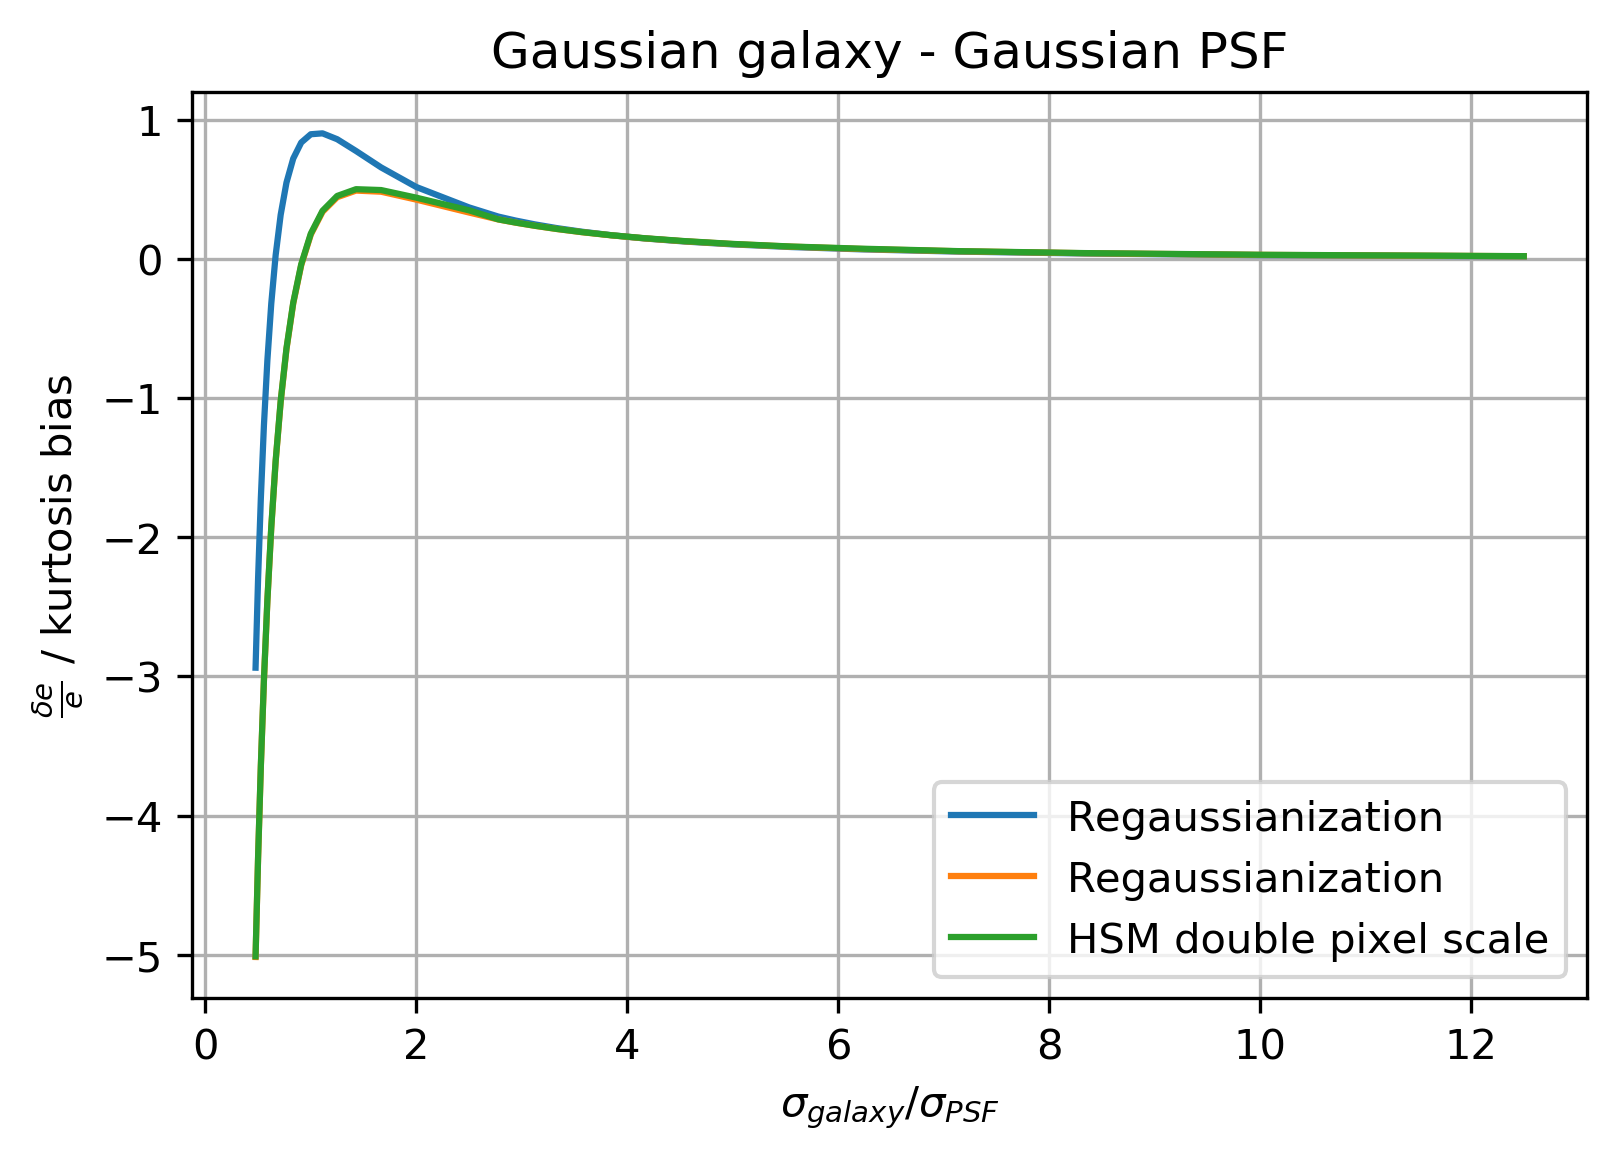

In [17]:
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test12result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test12result]),label='Metacal')
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test5_REGAUSSresult],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test5_REGAUSSresult]),label='Regaussianization')
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test6result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test6result]),label='HSM double pixel scale')

plt.xlabel(r"$\sigma_{galaxy}/\sigma_{PSF}$")
plt.ylabel(r'$\frac{\delta e}{e}$ / kurtosis bias')
plt.title("Gaussian galaxy - Gaussian PSF")
plt.legend()




plt.grid()
plt.show()

In [286]:
test14= [("gaussian" ,5.0    ,0.0,0.02,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5}) for i in range(15)
    ]+[("gaussian" ,1.0    ,0.0,0.02,"sersic"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5}) for i in range(18)]

In [287]:
test14result = []
for i in range(len(test14)):
    test = PSFSameSecondTest(*test14[i][:-1],**test14[i][-1])
    results = test.get_results(metacal = True)
    test14result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test14)*100)+"%")
    

Finished 100.0%


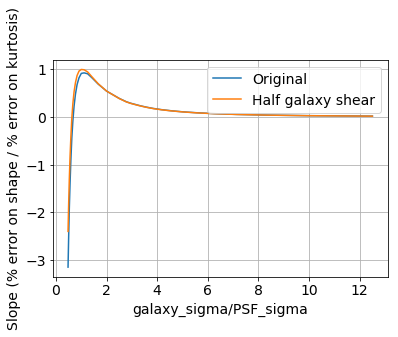

In [288]:
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test12result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test12result]),label='Original')
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test14result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test14result]),label='Half galaxy shear')

plt.xlabel("galaxy_sigma/PSF_sigma")
plt.ylabel("Slope (% error on shape / % error on kurtosis)")
plt.legend()




plt.grid()
plt.show()

In [291]:
# different type of galaxy and different type of psf light profile, but with 2.0 gal_sig and 0.6 psf_sig
#       gal_type   ,gal_sig,e1 ,e2 , psf_type    ,psf_sig,SE   ,optionals    
test15= [("gaussian" ,0.5    ,0.0,0.28,"kolmogorov"  ,0.3     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5, 'mod_kol_radius_ratio':1+(i-20)*0.01}) for i in range(41)
      ]

In [292]:
test15result = []
for i in range(len(test15)):
    test = PSFSameSecondTest(*test15[i][:-1],**test15[i][-1])
    results = test.get_results(metacal = True)
    test15result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test15)*100)+"%")
    

Finished 100.0%


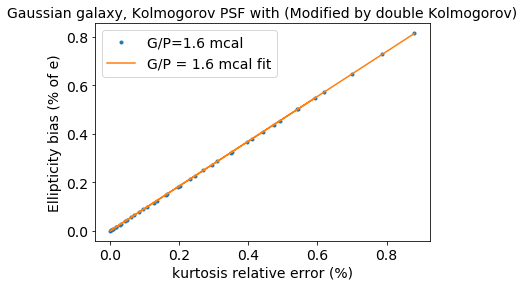

In [293]:
xlisttest15 = np.array([t['kurtosis_perc_error'] for t in test15result])
ylisttest15 = 100*np.array([t["measurement"]/t['e2'] for t in test15result])
poly15 = np.polyfit(xlisttest15,ylisttest15,1)
yfit15 = poly15[0]*xlisttest15+poly15[1]  
plt.plot([t['kurtosis_perc_error'] for t in test15result],100*np.array([t["measurement"]/t['e2'] for t in test15result]),'.',label = 'G/P=1.6 mcal')
plt.plot(xlisttest15,yfit15,label='G/P = 1.6 mcal fit')
plt.xlabel("kurtosis relative error (%)")
plt.ylabel("Ellipticity bias (% of e)")
plt.legend()
plt.title("Gaussian galaxy, Kolmogorov PSF with (Modified by double Kolmogorov)")
plt.show()

In [13]:
# different type of galaxy and different type of psf light profile, but with 2.0 gal_sig and 0.6 psf_sig
#       gal_type   ,gal_sig,e1 ,e2 , psf_type    ,psf_sig,SE   ,optionals    
test16= [("gaussian" ,0.5    ,0.0,0.28,"kolmogorov"  ,0.5     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5, 'mod_kol_radius_ratio':1+(i-20)*0.01}) for i in range(41)
      ]

In [15]:
test16result = []
for i in range(len(test16)):
    test = homesm.PSFSameSecondTest(*test16[i][:-1],**test16[i][-1])
    results = test.get_results(metacal = True)
    test16result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test16)*100)+"%")
    

Finished 100.0%


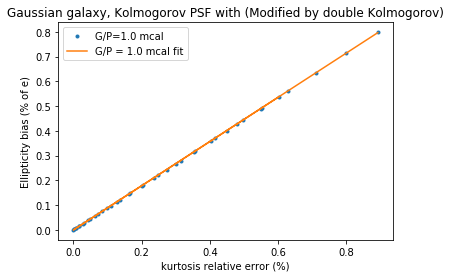

In [18]:
xlisttest16 = np.array([t['kurtosis_perc_error'] for t in test16result])
ylisttest16 = 100*np.array([t["measurement"]/t['e2'] for t in test16result])
poly16 = np.polyfit(xlisttest16,ylisttest16,1)
yfit16 = poly16[0]*xlisttest16+poly16[1]  
plt.plot([t['kurtosis_perc_error'] for t in test16result],100*np.array([t["measurement"]/t['e2'] for t in test16result]),'.',label = 'G/P=1.0 mcal')
plt.plot(xlisttest16,yfit16,label='G/P = 1.0 mcal fit')
plt.xlabel("kurtosis relative error (%)")
plt.ylabel("Ellipticity bias (% of e)")
plt.legend()
plt.title("Gaussian galaxy, Kolmogorov PSF with (Modified by double Kolmogorov)")
plt.show()

In [33]:
test17= [("gaussian" ,5.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2}) for i in range(7)
    ]+[("gaussian" ,1.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2}) for i in range(18)]
test17result = []
for i in range(len(test17)):
    test = homesm.PSFSameSecondTest(*test17[i][:-1],**test17[i][-1])
    results = test.get_results(metacal = True)
    test17result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test17)*100)+"%")
    

Finished 100.0%


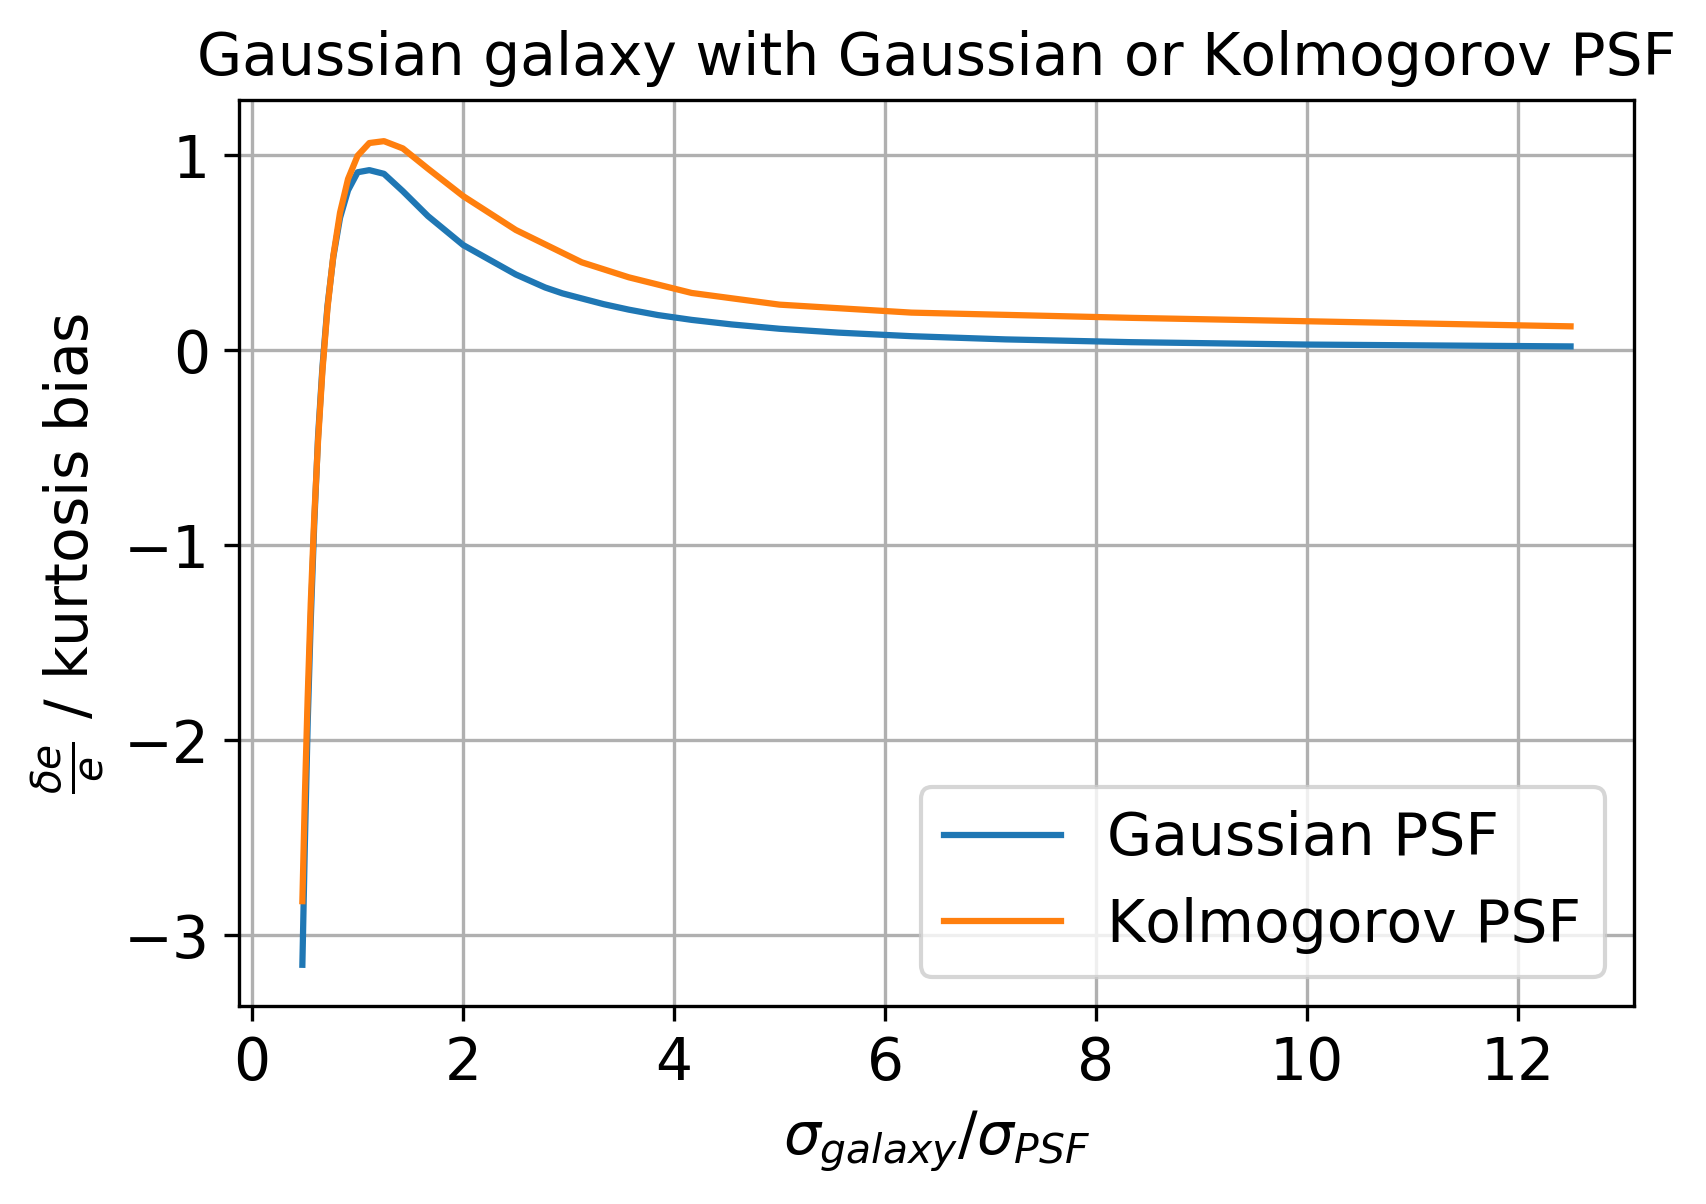

In [82]:
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test12result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test12result]),label='Gaussian PSF')
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test17result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test17result]),label='Kolmogorov PSF')

plt.xlabel(r"$\sigma_{galaxy}/\sigma_{PSF}$")
plt.ylabel(r'$\frac{\delta e}{e}$ / kurtosis bias')
plt.title("Gaussian galaxy with Gaussian or Kolmogorov PSF")
plt.legend()




plt.grid()
plt.show()

In [354]:
test18= [("gaussian" ,1.0    ,0.0,0.28,"kolmogorov"  ,1.4     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.48+0.001*i,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5, 'mod_kol_radius_ratio':1+(i-20)*0.01}) for i in range(41)
      ]

In [355]:
test18result = []
for i in range(len(test18)):
    test = PSFSameSecondTest(*test18[i][:-1],**test18[i][-1])
    results = test.get_results(metacal = True)
    test18result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test18)*100)+"%")
    

Finished 100.0%


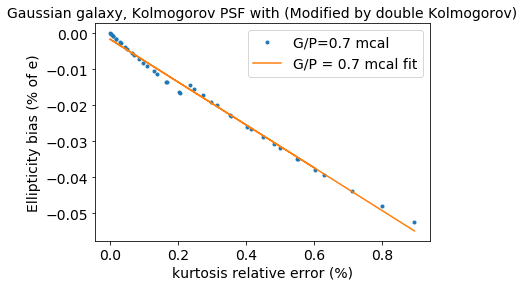

In [356]:
xlisttest18 = np.array([t['kurtosis_perc_error'] for t in test18result])
ylisttest18 = 100*np.array([t["measurement"]/t['e2'] for t in test18result])
poly18 = np.polyfit(xlisttest18,ylisttest18,1)
yfit18 = poly18[0]*xlisttest18+poly18[1]  
plt.plot([t['kurtosis_perc_error'] for t in test18result],100*np.array([t["measurement"]/t['e2'] for t in test18result]),'.',label = 'G/P=0.7 mcal')
plt.plot(xlisttest18,yfit18,label='G/P = 0.7 mcal fit')
plt.xlabel("kurtosis relative error (%)")
plt.ylabel("Ellipticity bias (% of e)")
plt.legend()
plt.title("Gaussian galaxy, Kolmogorov PSF with (Modified by double Kolmogorov)")
plt.show()

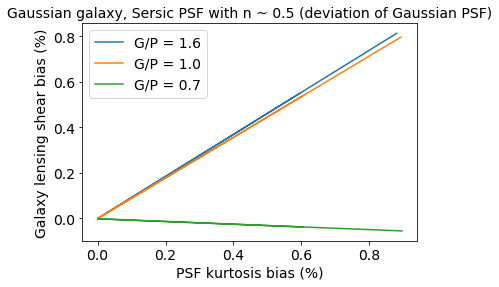

In [358]:
plt.plot(xlisttest15,yfit15,label='G/P = 1.6')
plt.plot(xlisttest16,yfit16,label='G/P = 1.0')
plt.plot(xlisttest18,yfit18,label='G/P = 0.7')

plt.xlabel("PSF kurtosis bias (%)")
plt.ylabel("Galaxy lensing shear bias (%)")
plt.legend()
plt.title("Gaussian galaxy, Sersic PSF with n ~ 0.5 (deviation of Gaussian PSF)")
plt.show()



In [34]:
catalog  = pd.read_csv("PSFSTAR.csv",header = 0)



In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
catalog.head(50)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,# object_id,parent_id,ira,idec,imag_psf,imag_psf_err,iflux_psf,iflux_psf_err,iflux_psf_flags,ishape_sdss_ixx,ishape_sdss_iyy,ishape_sdss_ixy,ishape_sdss_ixx_var,ishape_sdss_iyy_var,ishape_sdss_ixy_var,ishape_sdss_psf_ixx,ishape_sdss_psf_iyy,ishape_sdss_psf_ixy,tract,icalib_psf_used,merge_peak_g,merge_peak_r,merge_peak_i,merge_peak_z,merge_peak_y,icountinputs,ideblend_has_stray_flux,iflags_pixel_bright_object_center,iflags_pixel_bright_object_any,iblendedness_abs_flux,iflags_negative,ideblend_too_many_peaks,ideblend_parent_too_big,icentroid_naive_flags,iflags_pixel_interpolated_any,iflags_pixel_saturated_any,iflags_pixel_cr_any,iflags_pixel_suspect_any,SNR,logSNR,psf_kurtosis,star_kurtosis,near_neighbor,psf_filename,star_filename,bias_mcal_0.5,bias_mcal_1.0,bias_regau_1.0,bias_mcal_0.3,bias_mcal_0.7,bias_mcal_1.5,bias_regau_0.3,bias_regau_0.5,bias_regau_0.7,bias_regau_1.5,bias_regau_2.0,bias_regau_2.5,bias_mcal_2.0,bias_mcal_2.5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3489723,41222902833503954,41222902833482321,218.447027,-0.979509,18.986954,0.000555,9.230366e-28,4.716077e-31,False,0.053075,0.058337,-0.000245,7.678978e-09,4.220781e-09,9.276182e-09,0.053850,0.059077,-0.000280,9373,True,True,True,True,True,True,5,False,False,False,6.036608e-04,False,False,False,False,False,False,False,False,1957.212583,3.291638,2.159539,2.157826,False,psf-20191107-020811Z/2-psf-calexp-pdr2_wide-HS...,images/group_1/2-cutout-HSC-I-9373-pdr2_wide.fits,-1.837422,0.891567,0.954748,-4.154021,-0.250689,1.200368,-3.911741,-1.847896,-0.234268,1.267951,1.038511,0.793822,0.991738,0.760809
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6996938,42305788642875861,42305788642854104,221.717596,0.669608,19.397453,0.000677,6.324390e-28,3.944576e-31,False,0.054717,0.057247,0.001086,1.248261e-08,6.532812e-09,1.366245e-08,0.054774,0.057310,0.001101,9619,True,True,True,True,True,True,6,False,False,False,1.883663e-08,False,False,False,False,False,False,False,False,1603.313087,3.205018,2.137676,2.142536,False,psf-20191107-020811Z/3-psf-calexp-pdr2_wide-HS...,images/group_1/3-cutout-HSC-I-9619-pdr2_wide.fits,0.034126,1.963897,1.922421,-0.018890,1.298722,1.594825,0.024630,0.083266,1.292580,1.543188,1.073068,0.758088,1.116539,0.791878
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3380238,41218801139743594,41218801139717469,216.722775,-0.002674,20.451958,0.001074,2.394513e-28,2.368776e-31,False,0.046754,0.050778,0.001541,2.192697e-08,1.191780e-08,2.586694e-08,0.046983,0.051244,0.001441,9372,True,True,True,True,True,True,7,False,True,True,2.026705e-04,False,False,False,False,False,False,False,False,1010.865119,3.004693,2.143341,2.141194,False,psf-20191107-020811Z/4-psf-calexp-pdr2_wide-HS...,images/group_1/4-cutout-HSC-I-9372-pdr2_wide.fits,-0.299477,-1.001526,-0.935860,2.523484,-1.292872,-0.352945,2.685869,-0.151406,-1.180511,-0.356768,-0.137273,-0.058425,-0.111023,-0.028860
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3463073,41219462564705654,41219462564683014,215.663047,-1.075665,19.283977,0.000622,7.021154e-28,4.023909e-31,False,0.058993,0.065717,0.002155,1.269292e-08,7.079159e-09,1.575081e-08,0.059087,0.066369,0.002144,9372,True,True,True,True,True,True,7,False,True,True,3.170675e-06,False,False,False,False,False,False,False,False,1744.858995,3.241760,2.160847,2.160980,False,psf-20191107-020811Z/5-psf-calexp-pdr2_wide-HS...,images/group_1/5-cutout-HSC-I-9372-pdr2_wide.fits,2.338017,0.438184,0.476893,2.688902,1.181500,0.245967,2.373152,2.193134,1.191506,0.265746,0.202495,0.155619,0.196250,0.151506
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3132943,41210129600752049,0,213.586411,-0.471553,19.124619,0.000505,8.131157e-28,

In [32]:
def fit(x,a,b):
    return a*x+b

def get_avg(rad, shape_bias, kurtosis_bias, bin_width):
    average_bias = shape_bias[(kurtosis_bias>=rad-bin_width/2.) & (kurtosis_bias<rad+bin_width/2.)].mean()
    std_bias = shape_bias[(kurtosis_bias>=rad-bin_width/2.) & (kurtosis_bias<rad+bin_width/2.)].std()
    
    return average_bias, std_bias


def slope(bias_column,catalog):
    subcat = catalog[catalog[bias_column]!=-10]
    truth_kurtosis = np.array(subcat['star_kurtosis'])
    model_kurtosis = np.array(subcat['psf_kurtosis'])
    kurtosis_bias = (model_kurtosis - truth_kurtosis)/truth_kurtosis*100
    shape_bias = np.array(subcat[bias_column])
    popt,pcov=curve_fit(fit,kurtosis_bias,shape_bias,p0=(0.0, 0.0))
    plt.scatter(kurtosis_bias, shape_bias, s = 0.1)
    x = np.linspace(-0.5,0.5,100)
    y = x*popt[0]+popt[1]
    
    plt.plot(x,y)
    plt.xlim([-0.5,0.5])
    plt.ylim([-5,5])
    plt.show()
    
    return popt[0], np.sqrt(pcov[0][0])

def slope2(bias_column,catalog):
    subcat = catalog[catalog[bias_column]!=-10.0]
    truth_kurtosis = np.array(subcat['star_kurtosis'])
    model_kurtosis = np.array(subcat['psf_kurtosis'])
    kurtosis_bias = (model_kurtosis - truth_kurtosis)/truth_kurtosis*100
    shape_bias = np.array(subcat[bias_column])
    bin_number = 10  # Depending on how narrow you want your bins
    bin_width = 2.0/bin_number
    average_bias_list = []
    std_bias_list = []
    center_del_kurtosis = np.arange(-1,1,bin_width)
    for center in center_del_kurtosis:
        ave, std = get_avg(center, shape_bias, kurtosis_bias, bin_width)
        std_bias_list.append(std)
        average_bias_list.append(ave)
    #print center_del_kurtosis
    #print average_bias_list
    #print average_bias_list
    popt,pcov=curve_fit(fit,center_del_kurtosis,average_bias_list,p0=(0.0,0.0))
    #print popt, pcov
    return popt[0], np.sqrt(pcov[0][0])
    
    

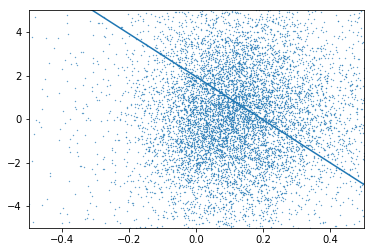

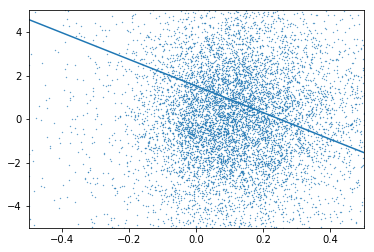

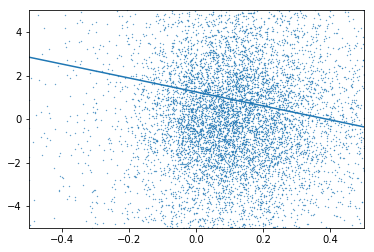

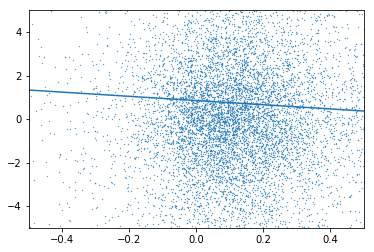

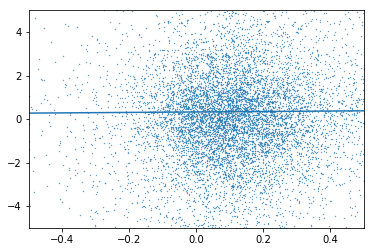

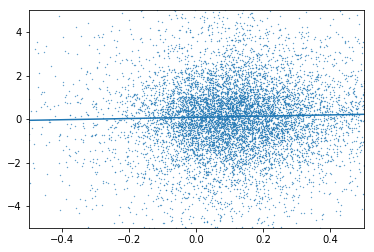

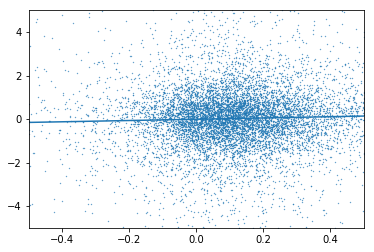

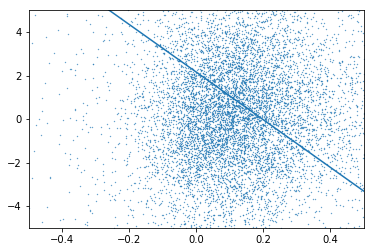

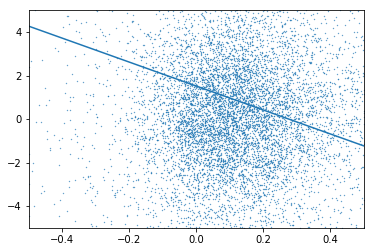

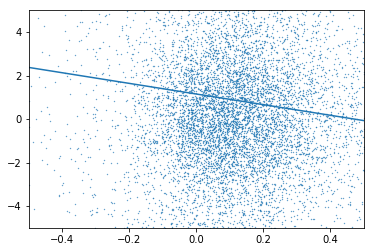

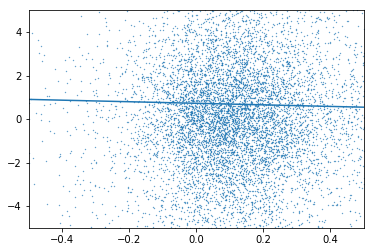

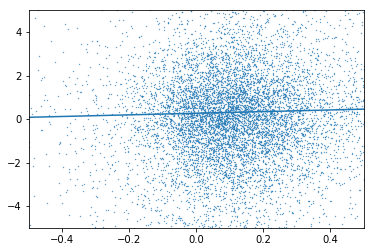

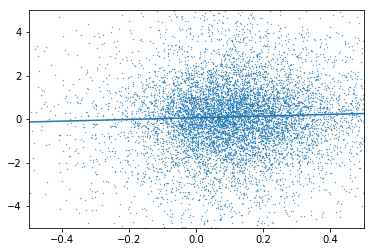

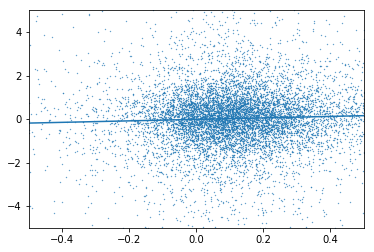

In [35]:
column_name_list_mcal = ['bias_mcal_0.3', 'bias_mcal_0.5', 'bias_mcal_0.7', 'bias_mcal_1.0', 'bias_mcal_1.5','bias_mcal_2.0', 'bias_mcal_2.5']
column_name_list_regau = ['bias_regau_0.3', 'bias_regau_0.5', 'bias_regau_0.7', 'bias_regau_1.0', 'bias_regau_1.5','bias_regau_2.0', 'bias_regau_2.5']

gal_size = [0.3,0.5,0.7,1.0,1.5, 2.0, 2.5]
size_ratio = np.array(gal_size)/0.3
slope_list = []
slope_error = []
for i in range(len(gal_size)):
    column_name = column_name_list_regau[i]
    result = slope(column_name, catalog)
    slope_list.append(result[0])
    slope_error.append(result[1])
    
slope_list_mcal = []
slope_error_mcal = []
for i in range(len(gal_size)):
    column_name = column_name_list_mcal[i]
    result = slope(column_name, catalog)
    slope_list_mcal.append(result[0])
    slope_error_mcal.append(result[1])
    

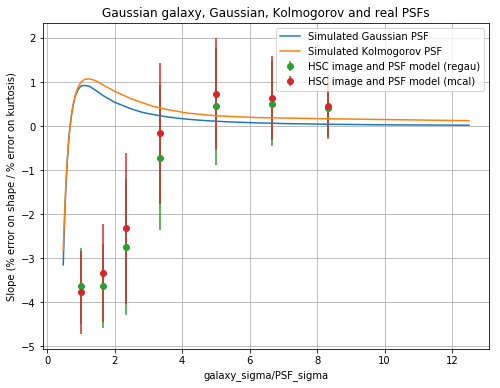

In [25]:
plt.figure(figsize = (8,6))
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test12result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test12result]),label='Simulated Gaussian PSF')
plt.plot([t['gal_sigma']/t['psf_sigma'] for t in test17result],100*np.array([t["measurement"]/(t['e2']*(t['kurtosis_perc_error'])) for t in test17result]),label='Simulated Kolmogorov PSF')

plt.errorbar(size_ratio, slope_list, slope_error, fmt = 'o', label = 'HSC image and PSF model (regau)')
plt.errorbar(size_ratio, slope_list_mcal, slope_error_mcal, fmt = 'o', label = 'HSC image and PSF model (mcal)')

plt.xlabel("galaxy_sigma/PSF_sigma")
plt.ylabel("Slope (% error on shape / % error on kurtosis)")
plt.title("Gaussian galaxy, Gaussian, Kolmogorov and real PSFs")
plt.legend()




plt.grid()
plt.show()

In [15]:
gal = galsim.Kolmogorov( half_light_radius = 0.6)
pixel_scale = 0.1

desire_sigma = 0.2

current_sigma = gal.drawImage(scale = pixel_scale, method = 'no_pixel').calculateMomentRadius()
print current_sigma
new_gal = gal.expand(desire_sigma/current_sigma)

print new_gal.drawImage(scale = pixel_scale, method = 'no_pixel').calculateMomentRadius()

0.6815665460324625
0.2015226240795308


In [16]:
#profile = galsim.Gaussian(sigma = 0.8)
profile = galsim.Sersic(0.51, half_light_radius = 1.0)
sigma = 0.2
pixel_scale = 0.1

image = profile.drawImage(scale = pixel_scale, method = 'no_pixel')
#true_sigma = image.calculateMomentRadius()
true_sigma = galsim.hsm.FindAdaptiveMom(image).moments_sigma*pixel_scale

ratio = sigma/true_sigma
new_profile = profile.expand(1.1)

while abs(true_sigma - sigma)>1e-4:
    ratio = sigma/true_sigma
    new_profile = new_profile.expand(ratio)
    
    image = new_profile.drawImage(scale = pixel_scale, method = 'no_pixel')
    true_sigma = image.calculateMomentRadius()
    #true_sigma = galsim.hsm.FindAdaptiveMom(image).moments_sigma*pixel_scale



In [17]:
print galsim.hsm.FindAdaptiveMom(new_profile.drawImage(scale = pixel_scale, method = 'no_pixel')).moments_sigma*pixel_scale

0.198617529869


In [ ]:




test17= [("bpd" ,5.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.2*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2}) for i in range(7)
    ]+[("bpd" ,1.0    ,0.0,0.02,"kolmogorov"  ,0.4+0.1*i     ,0.0,0.0,{'subtract_intersection':True,'psf_sersicn':0.51,'pixel_scale':0.1,'metacal_method':'estimateShear','gal_flux':1e5,'mod_kol_radius_ratio':1.2}) for i in range(18)]
test17result = []
for i in range(len(test17)):
    test = homesm.PSFSameSecondTest(*test17[i][:-1],**test17[i][-1])
    results = test.get_results(metacal = True)
    test17result.append(results)
    clear_output() 
    print ("Finished "+str(float((i+1))/len(test17)*100)+"%")
    